
# <div style="text-align: center; background-color: #00A300; color: yellow; padding: 14px; line-height: 1;border-radius:20px">💊 COVID-19 🦠 Tweet Dataset</div>


![tweets](https://miro.medium.com/max/1400/1*hVyyXKWHskqeVxOXrMckLg.jpeg)

<h3 style="text-align: left; background-color: #9DBD48; color: black; padding: 14px; line-height: 1; border-radius:10px"> Importing necessary libraries📁</h3>
<br>

In [1]:
# Importing packages for Data Analysis

import numpy as np  # Linear Algebra
import pandas as pd # Data Processing

# Importing packages for Data Visuals
import matplotlib.pyplot as plt
import seaborn as sns
import branca.colormap
%matplotlib inline

# Importing packages for Interactive Data Visuals
import folium
from folium.plugins import HeatMap
import folium.plugins as plugins
from folium import FeatureGroup, LayerControl, Map
from branca.colormap import LinearColormap
from branca.colormap import linear
from plotly import __version__
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

from IPython.display import HTML
import plotly.express as px

# Importing Wordcloud for Visual
from wordcloud import WordCloud, STOPWORDS

import spacy
nlp = spacy.load('en_core_web_sm')


C:\Users\ADMIN\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [2]:
# Importing natural language packages/library to process text
import re
import nltk 
from textblob import TextBlob

from nltk.corpus import stopwords 
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Downloading data for NLTK 
nltk.download('stopwords', quiet=True)
nltk.download('opinion_lexicon', quiet=True)
nltk.download('punkt',quiet=True)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<h3 style="text-align: left; background-color: #9DBD48; color: black; padding: 14px; line-height: 1; border-radius:10px"> Exploration Data Analysis (EDA)🔎</h3>

In [3]:
df = pd.read_csv("D:/SIBMB/SEM 3/TM/Grp Assignment/covidvaccine.csv")
df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16792\4079493533.py:1: DtypeWarning:

Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.



user_name              user_location  \
0                 MyNewsNE                      Assam   
1            Shubham Gupta                        NaN   
2  Journal of Infectiology                        NaN   
3                     Zane                        NaN   
4       Ann-Maree O’Connor  Adelaide, South Australia   

                                    user_description      user_created  \
0  MyNewsNE a dedicated multi-lingual media house...  24-05-2020 10:18   
1  I will tell about all experiences of my life f...  14-08-2020 16:42   
2  Journal of Infectiology (ISSN 2689-9981) is ac...  14-12-2017 07:07   
3                                  Fresher than you.  18-09-2019 11:01   
4  Retired university administrator. Melburnian b...  24-01-2013 14:53   

   user_followers user_friends user_favourites user_verified  \
0            64.0         11.0           110.0         False   
1             1.0         17.0             0.0         False   
2           143.0        566.0             8.0         False   
3            29.0         25.0           620.0         False   
4            83.0        497.0         10737.0         False   

               date                                               text  \
0  18-08-2020 12:55  Australia to Manufacture Covid-19 Vaccine and ...   
1  18-08-2020 12:55  #CoronavirusVaccine #CoronaVaccine #CovidVacci...   
2  18-08-2020 12:46  Deaths due to COVID-19 in Affected Countries\n...   
3  18-08-2020 12:45  @Team_Subhashree @subhashreesotwe @iamrajchoco...   
4  18-08-2020 12:45  @michellegrattan @ConversationEDU This is what...   

                                            hashtags               source  \
0                                   ['CovidVaccine']      Twitter Web App   
1  ['CoronavirusVaccine', 'CoronaVaccine', 'Covid...  Twitter for Android   
2                                                NaN      Twitter Web App   
3                                                NaN  Twitter for Android   
4                                                NaN      Twitter Web App   

  is_retweet  
0      False  
1      False  
2      False  
3      False  
4      False

In [4]:
df.shape

(399645, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399645 entries, 0 to 399644
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         399626 non-null  object 
 1   user_location     315133 non-null  object 
 2   user_description  377791 non-null  object 
 3   user_created      399619 non-null  object 
 4   user_followers    399597 non-null  float64
 5   user_friends      399597 non-null  object 
 6   user_favourites   399597 non-null  object 
 7   user_verified     399597 non-null  object 
 8   date              399595 non-null  object 
 9   text              399597 non-null  object 
 10  hashtags          337962 non-null  object 
 11  source            397185 non-null  object 
 12  is_retweet        399576 non-null  object 
dtypes: float64(1), object(12)
memory usage: 39.6+ MB


<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #9DBD48; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>Missing Values📝</b></h3>

In [6]:
Missing_values = df.isnull().sum() / len(df) *100

Missing_values.iplot(kind='bar',title='Missing values in each columns in %',theme='white',color='#3DD8AD')

In [7]:
# Dropping rows with null values in the "text" and "user_name" column
df.dropna(subset=['text'], inplace=True)
df.dropna(subset=['user_name'], inplace=True)

# Resetting the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [8]:
df.isnull().sum()

user_name               0
user_location       84476
user_description    21833
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    2
text                    0
hashtags            61621
source               2412
is_retweet             21
dtype: int64

In [9]:
# Taking care of nulls in location and description

df.user_location.fillna('Unknown', inplace=True)
df.user_description.fillna('Unknown', inplace=True)
df.source.fillna('Unknown', inplace=True)
df.hashtags.fillna('None', inplace=True)

In [10]:
# Verifying
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399578 entries, 0 to 399577
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         399578 non-null  object 
 1   user_location     399578 non-null  object 
 2   user_description  399578 non-null  object 
 3   user_created      399578 non-null  object 
 4   user_followers    399578 non-null  float64
 5   user_friends      399578 non-null  object 
 6   user_favourites   399578 non-null  object 
 7   user_verified     399578 non-null  object 
 8   date              399576 non-null  object 
 9   text              399578 non-null  object 
 10  hashtags          399578 non-null  object 
 11  source            399578 non-null  object 
 12  is_retweet        399557 non-null  object 
dtypes: float64(1), object(12)
memory usage: 39.6+ MB


<h3 style="text-align: left; background-color: #9DBD48; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>Location &#128205;</b></h3>

In [11]:
# Cleaning the location column
# As both country and city is mentioned

df["country"] = df.user_location.apply(lambda x: x.split(",")[-1].strip() \
                                            if ("," in x) else x)
df["city"] = df.user_location.apply(lambda x: x.split(",")[0].strip() \
                                            if ("," in x) else x)

# Replacing 2 digit US states with USA except UK
df["country"] = df.country.apply(lambda x: 'USA' if len(x.lower().strip())<3 and x!='uk' else x)

# Standarizing case senstive cases
df["country"] = df.country.apply(lambda x: 'USA' if x.lower().strip() in \
                                      ("united states, usa, us") else x)
df["country"] = df.country.apply(lambda x: 'India' if x.lower().strip() in \
                                      ("india") else x)

# Removing countries from city column
df["city"] = df.city.apply(lambda x: 'Unknown' if x.lower() in \
                                   ['india', 'united states', 'united kingdom', 'uk', 'usa', 'us'] \
                                   else x)

In [12]:
# Taking top 100 countries and cities excluding the unknown at index 0
top100_count = df.country.value_counts(sort=True, ascending=False)[1:101]
top100_count = pd.DataFrame(top100_count)

top100_city= df.city.value_counts(sort=True, ascending=False)[1:101]
top100_city = pd.DataFrame(top100_city)

In [13]:
def get_coordinates(input_type, name, output_as='center'):
    """
    Function to get coordinates of country/ city

    Attributes
    ----------
    input_type : str
        Pass 'country' or 'city' to generate the respective URL
    name : str
        Name of the country or city we need the coordinates for
    output_as : str
        Pass 'center' or 'boundingbox' depending upon what coordinates type to fetch
    
    Methods
    -------
        Returns the coordinates of the country or city
    """
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search?'+input_type+'='\
                             ,name,'&format=json&polygon=0')
    response = requests.get(url)
    try:
        response = response.json()[0]
        # parse response to list
        if output_as == 'center':
            lst = [response.get(key) for key in ['lat','lon']]
            output = [float(i) for i in lst]
        if output_as == 'boundingbox':
            lst = response[output_as]
            output = [float(i) for i in lst]
        return output
    
    except (IndexError, ValueError):
        # this will log the whole traceback
        return [0,0]

In [14]:
import requests

# Getting the latitudes and longitudes for the top 100 countries and cities
lat_long_count = [get_coordinates("country",coun) for coun in top100_count.index]
lat_long_city = [get_coordinates("city",city) for city in top100_city.index]

In [15]:
# Calling the get_coodinates() and drop the duplicates from dataframe
def top100_df(input_type,df,lat_long):
    # merge lat and long with original dataframe
    for i, pair in zip(df.index, lat_long):
        df.loc[i,'lat'] = pair[0]
        df.loc[i,'long'] = pair[1] 
    # reset the index as country names
    df.reset_index(level=0, inplace=True)
    if input_type=="country":
        df.rename(columns={"country":"# of tweets","index":"country"}, inplace=True)
    elif input_type=="city":
        df.rename(columns={"city":"# of tweets","index":"city"}, inplace=True)
    # drop the countries/ cities with unidetified and duplicated latitudes and longitudes
    df.drop_duplicates(subset=['lat','long'],inplace=True)
    return df

In [16]:
# Calling the top100_df() to finalize the country and city dataframes 
top100_count = top100_df("country",top100_count,lat_long_count)
top100_city = top100_df("city",top100_city,lat_long_city)

In [17]:
# Filter out rows with 'Unknown' in the 'country' column
top100_count_filtered = top100_count[top100_count['country'] != 'Unknown']

# Filter out rows with 'Unknown' in the 'city' column
top100_city_filtered = top100_city[top100_city['city'] != 'Unknown']

# Create a bar chart for tweets by country (filtered)
fig1 = px.bar(top100_count_filtered, x='country', y='# of tweets', color='country',
              title='Tweets by Country', labels={'# of tweets': 'Number of Tweets'})

# Create a bar chart for tweets by city (filtered)
fig2 = px.bar(top100_city_filtered, x='city', y='# of tweets', color='city',
              title='Tweets by City', labels={'# of tweets': 'Number of Tweets'})

# Update the layout for both figures
fig1.update_xaxes(tickangle=90)
fig2.update_xaxes(tickangle=90)

# Show the figures
fig1.show()
fig2.show()



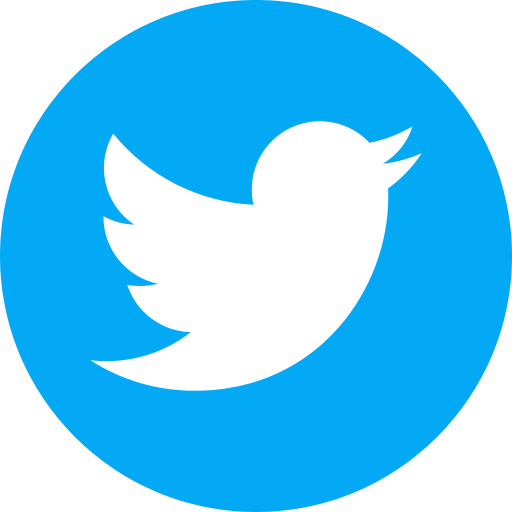
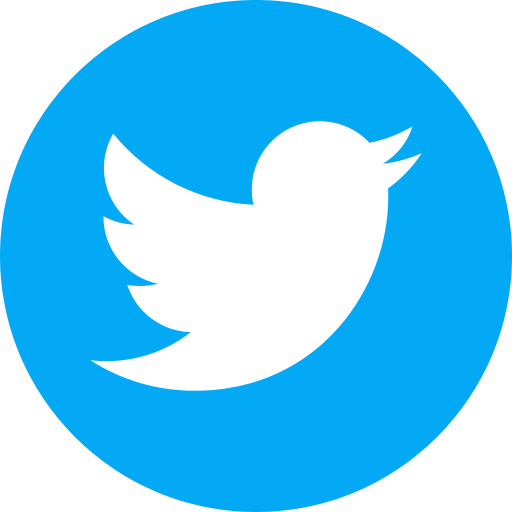
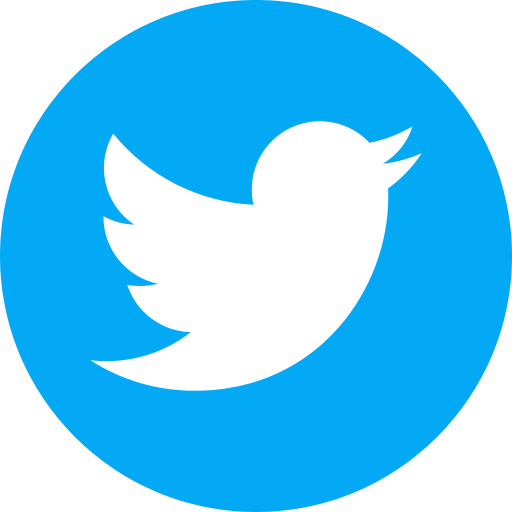
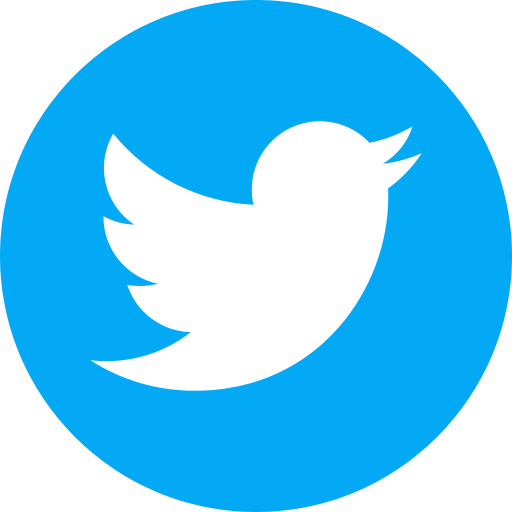
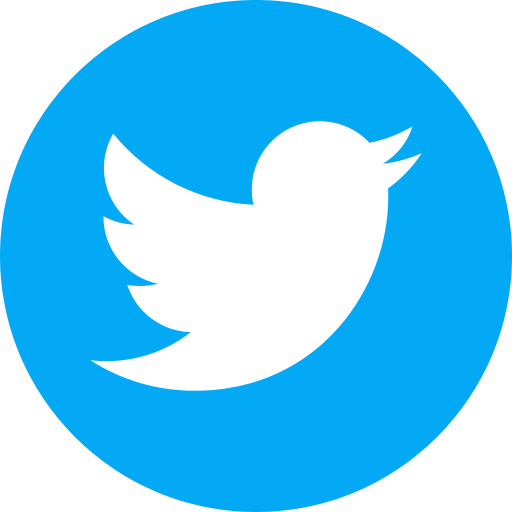
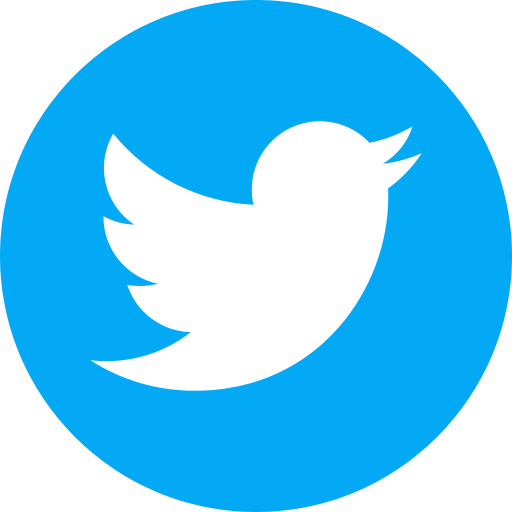
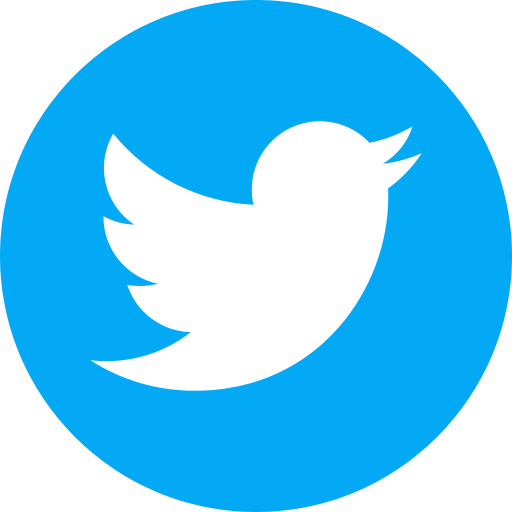
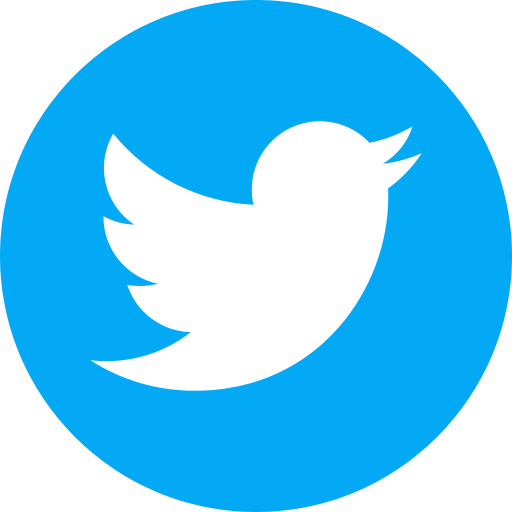
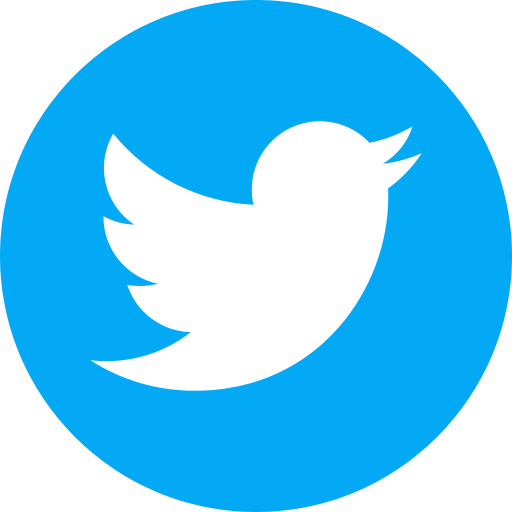
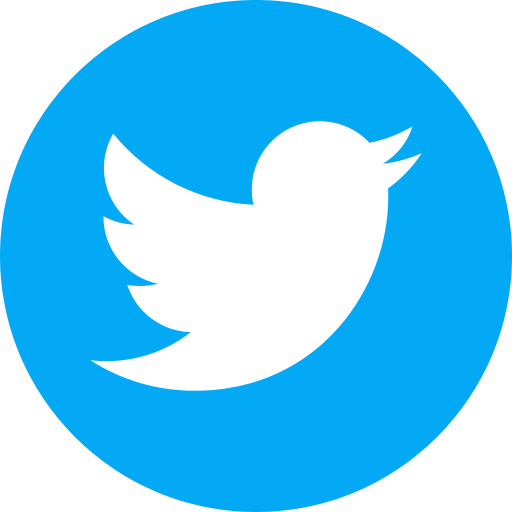
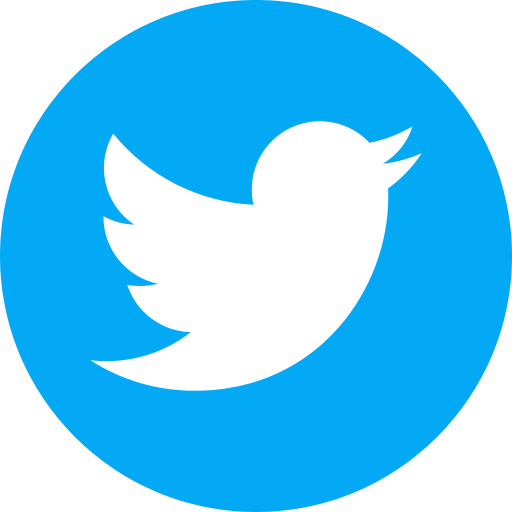
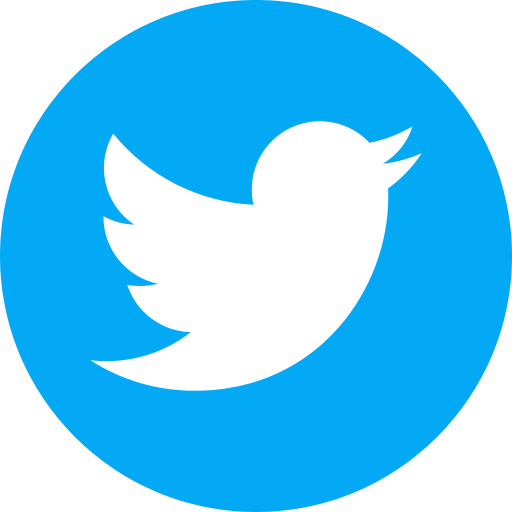
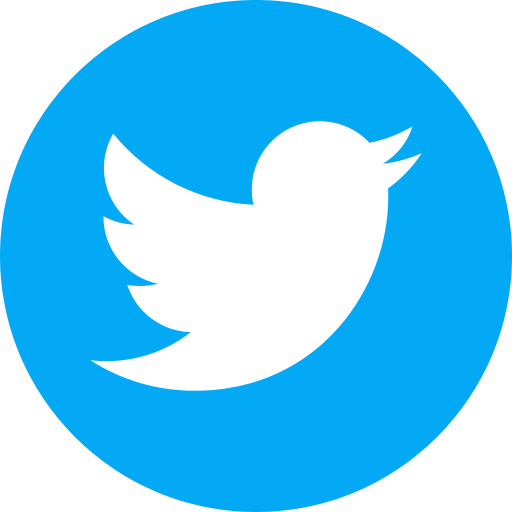
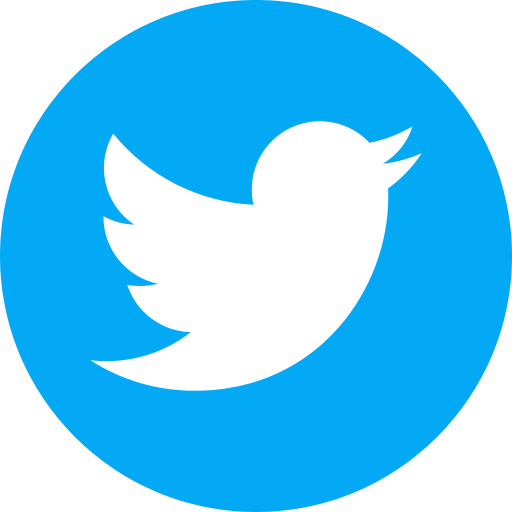
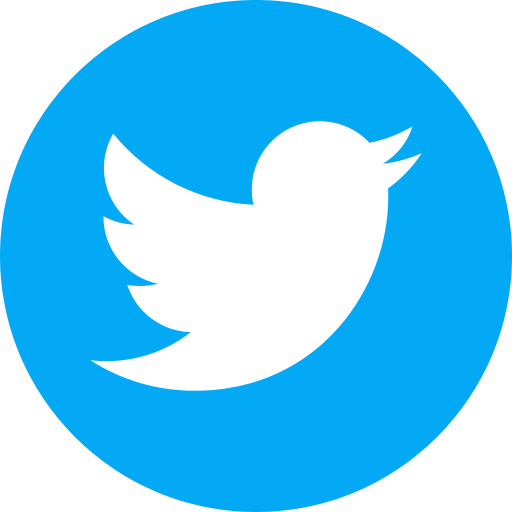
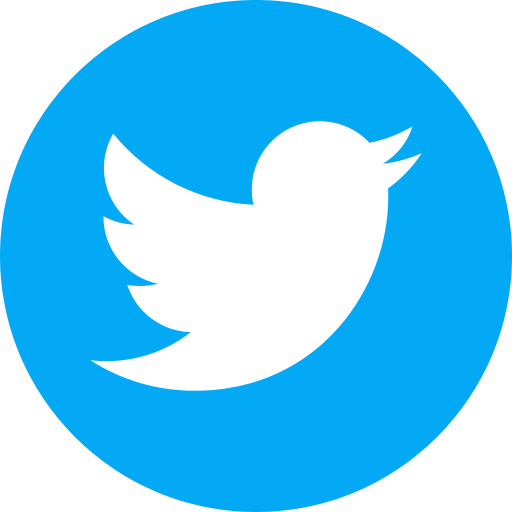
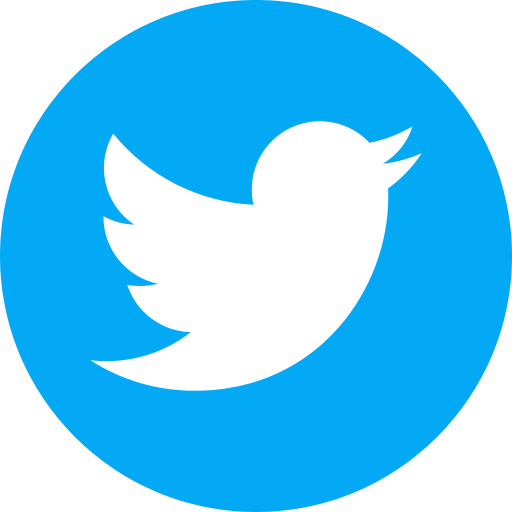
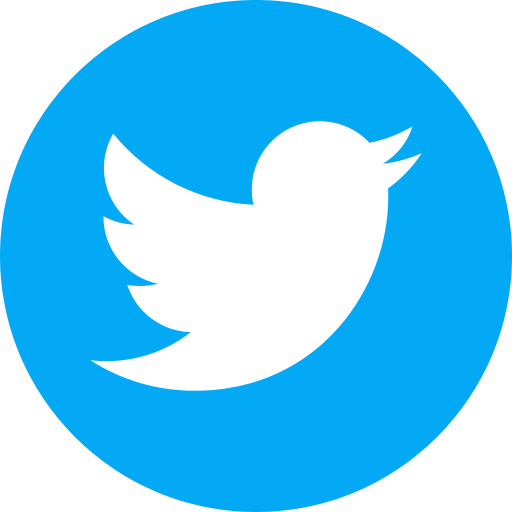
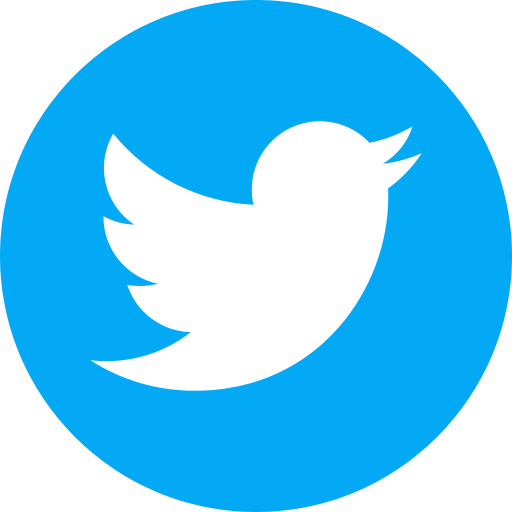
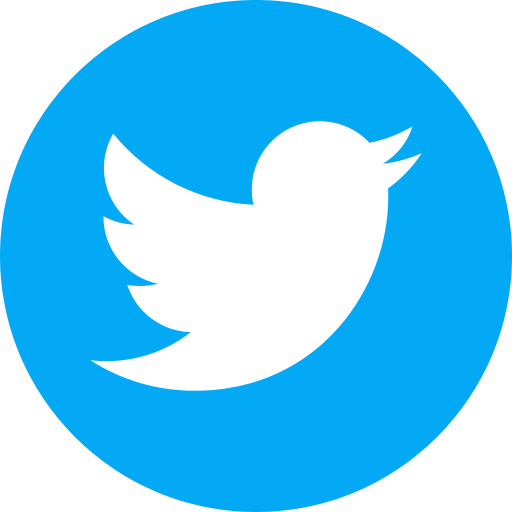
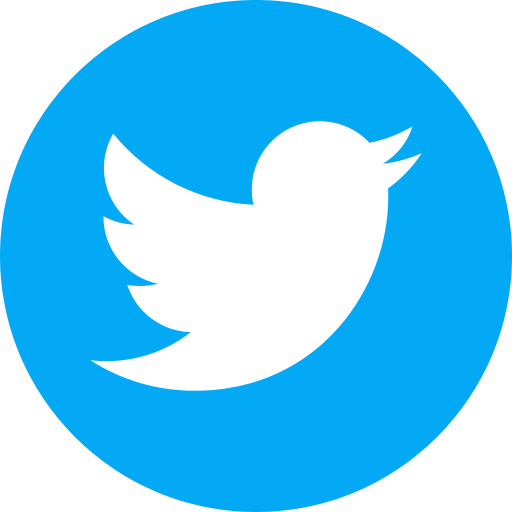
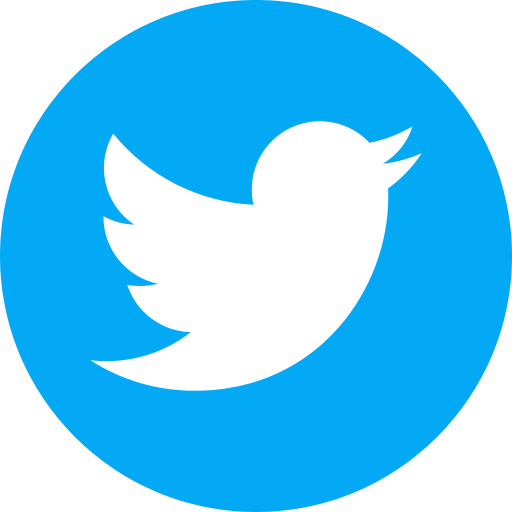
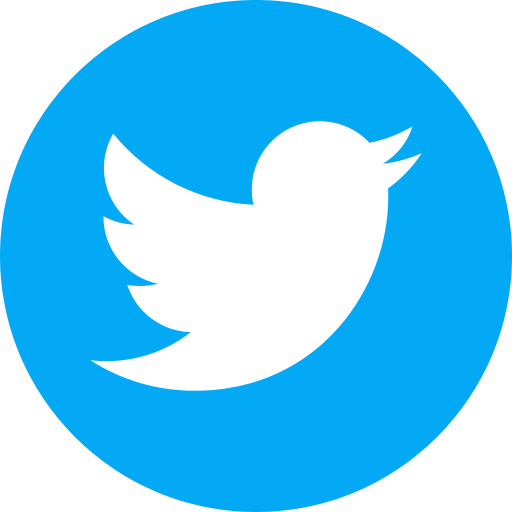

In [18]:
import folium

def color(magnitude):
    if magnitude >= 2000:
        col = 'red'
    elif 500 <= magnitude < 2000:
        col = 'beige'
    elif magnitude < 500:
        col = 'green'
    return col

def generateBaseMap(input_type, df, default_location=[40.693943, -73.985880], default_zoom_start=2):
    """
    Function to generate the heatmap

    Attributes
    ----------
    input_type : str
        Pass 'country' or 'city' to generate the respective heatmap
    df : str
        Name of the dataframe having the country/city coordinates and other details
    default_location : int
        Pass the default location for the displayed heatmap
    default_zoom_start: int
        Pass the default zoom for the displayed heatmap

    Methods
    -------
        Returns the base_map
    """

    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)

    for lat, lan, tweet, name in zip(df['lat'], df['long'], df['# of tweets'], df.iloc[:, 0]):
        # Create a custom icon using a custom image
        twitter_icon = folium.CustomIcon(
            icon_image="twitter-icon.png",  # Path to your custom image
            icon_size=(30, 30)
        )
        folium.Marker(location=[lat, lan], popup=[name, tweet], icon=twitter_icon).add_to(base_map)

    # Heatmap layer should be added after adding markers
    HeatMap(data=df[['lat', 'long']].values.tolist(), radius=20, max_zoom=13).add_to(base_map)

    # Specify the min and max values of your data
    min_val, max_val = df['# of tweets'].min(), df['# of tweets'].max()
    colormap = folium.LinearColormap(['green', 'beige', 'red'], vmin=min_val, vmax=max_val)
    colormap.caption = input_type.title() + ' distribution of COVID-19 tweets'
    colormap.add_to(base_map)

    return base_map

# Calling the function to generate the map
generateBaseMap('country', top100_count)


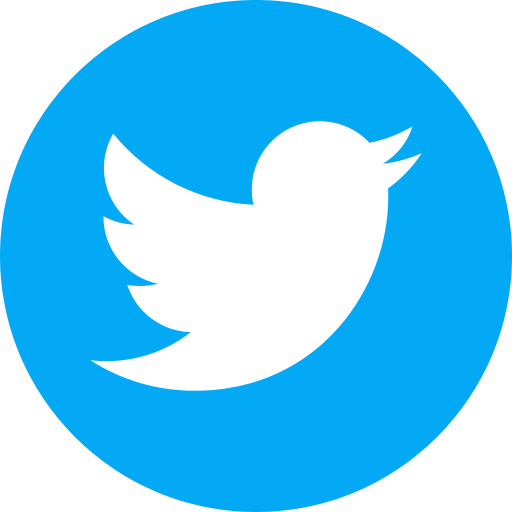
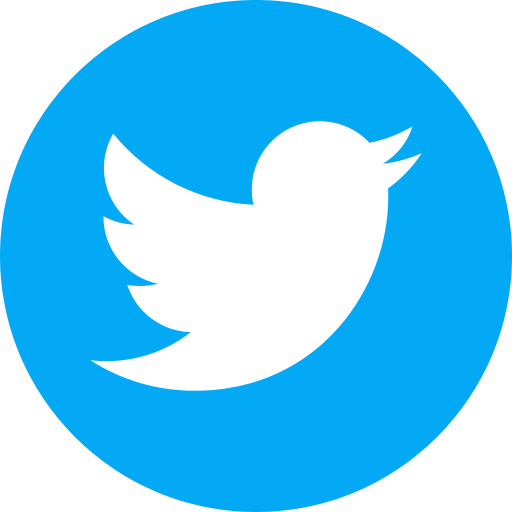
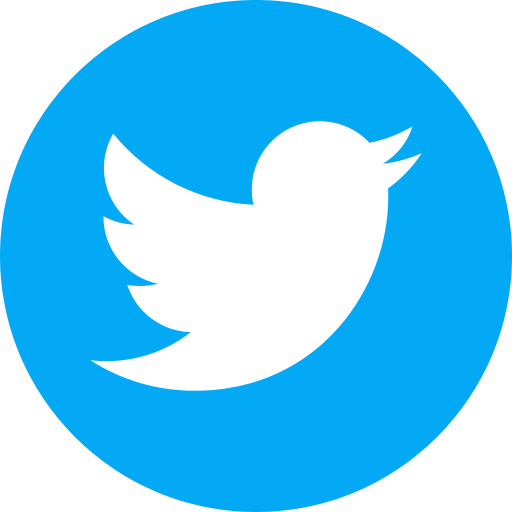
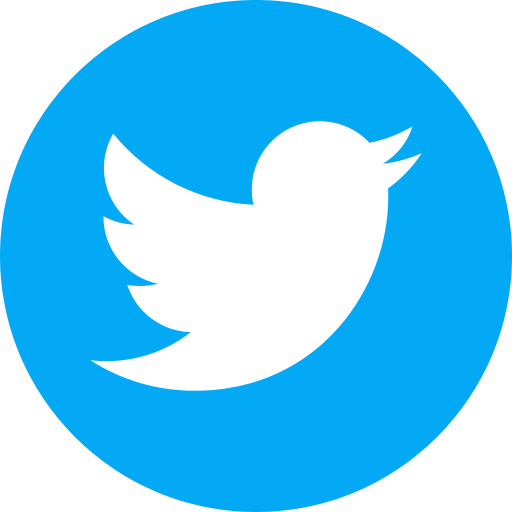
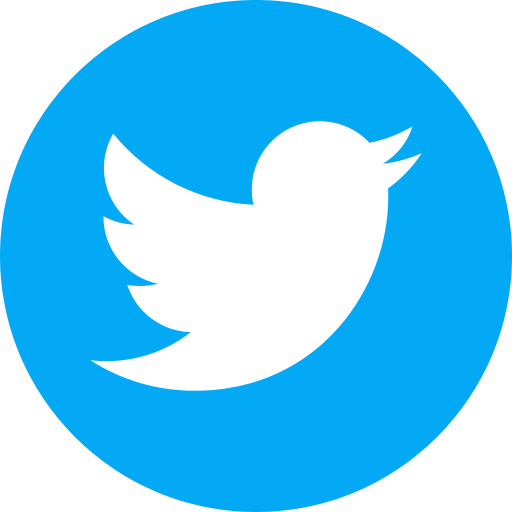
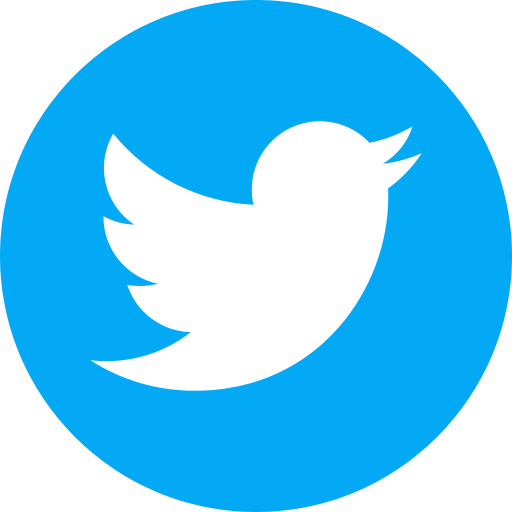
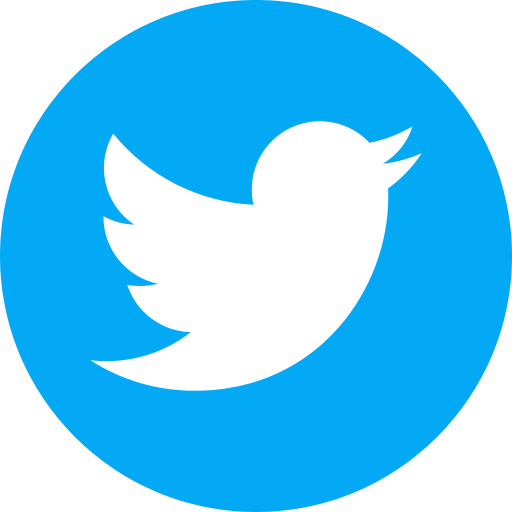
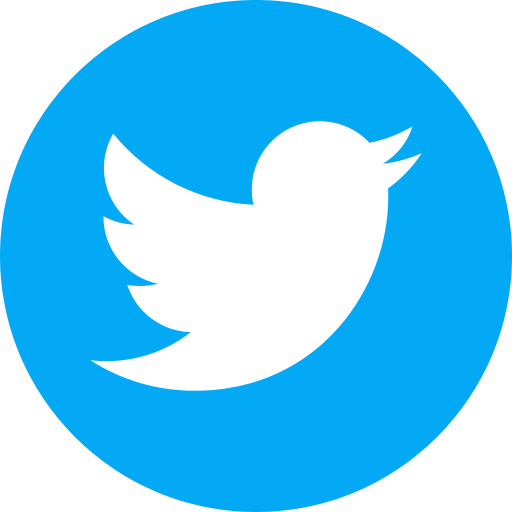
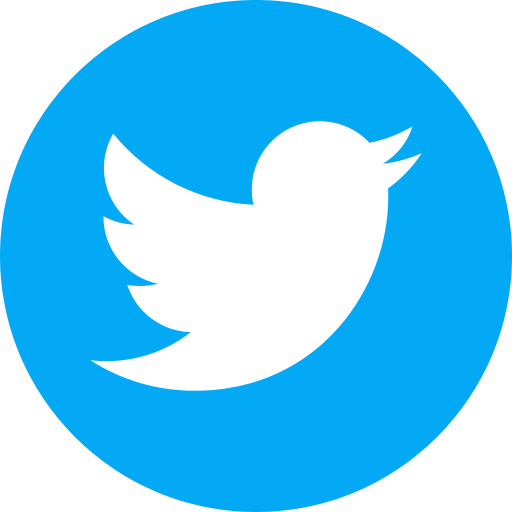
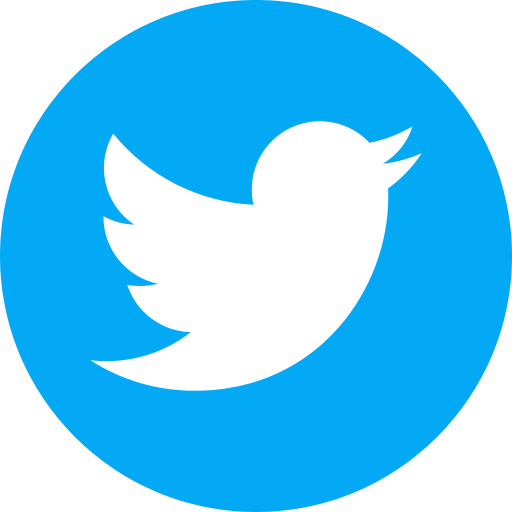
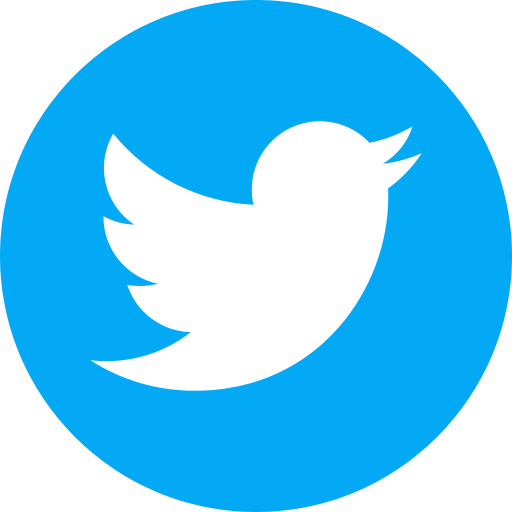
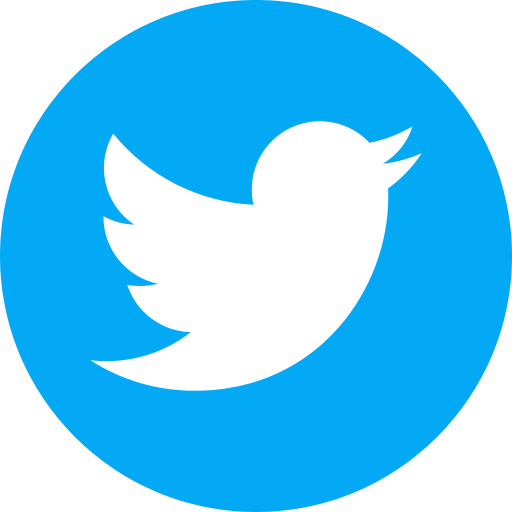
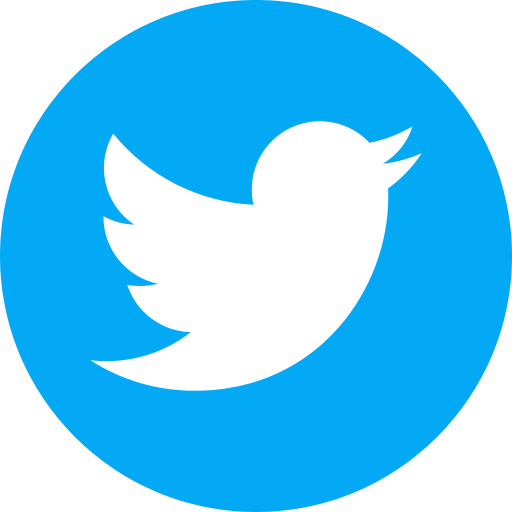
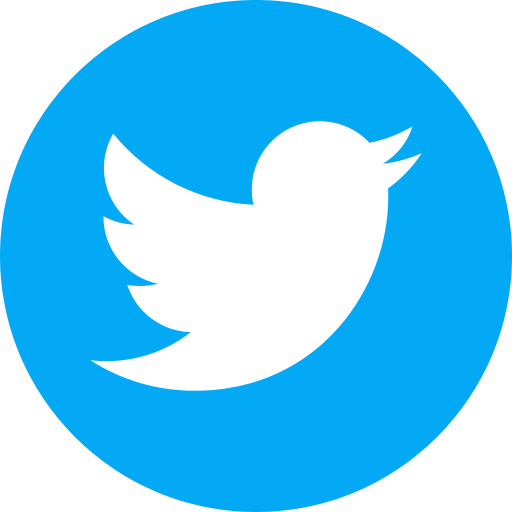
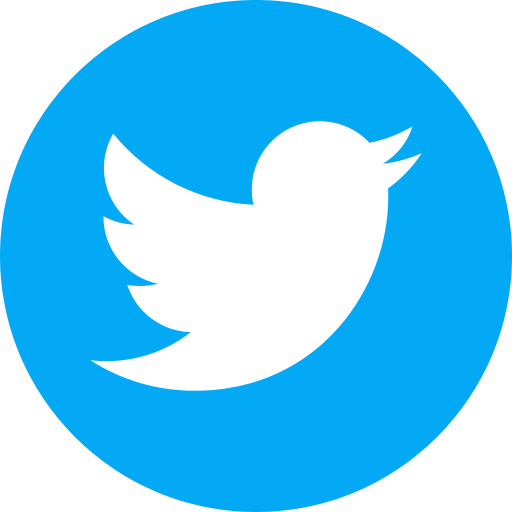
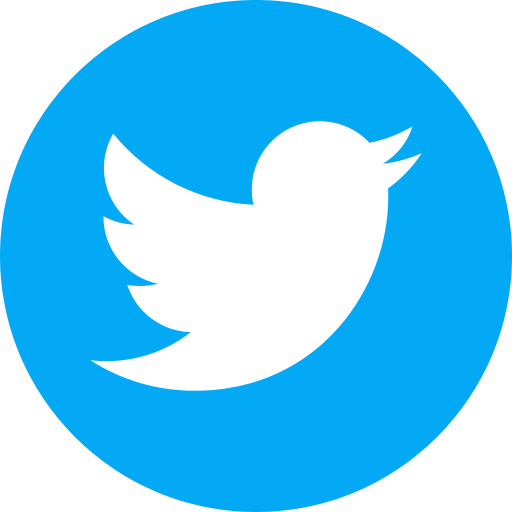
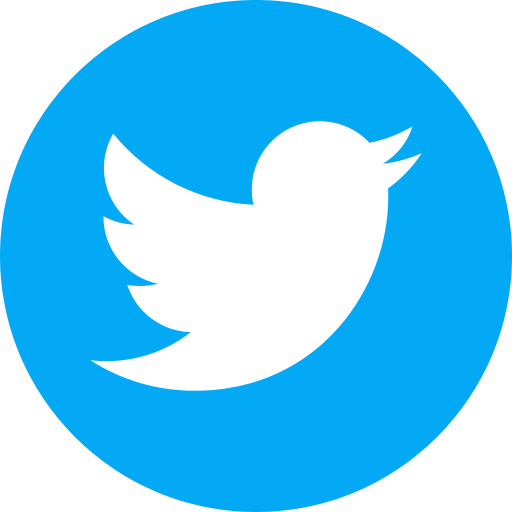
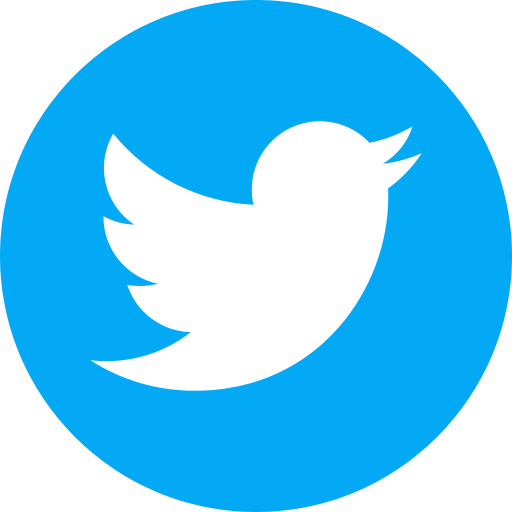
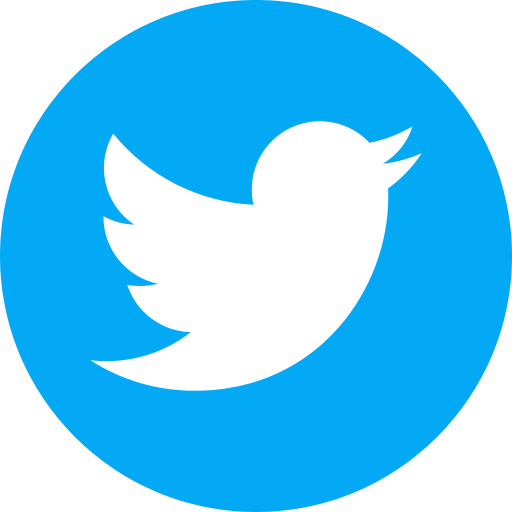
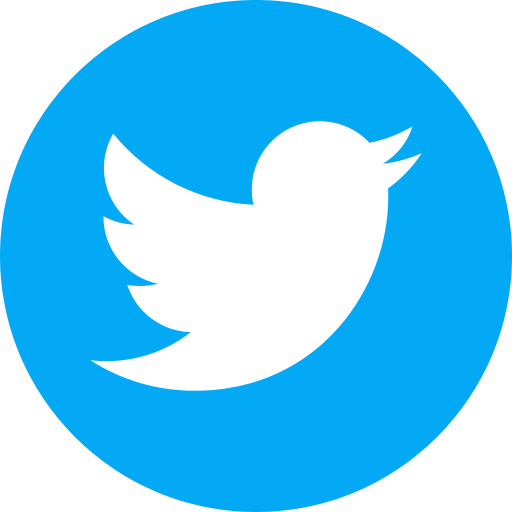
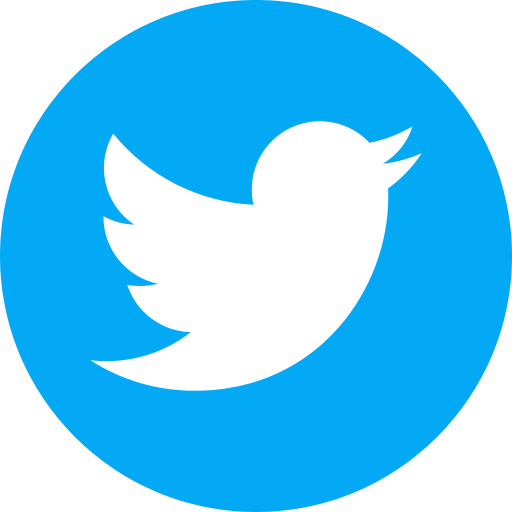
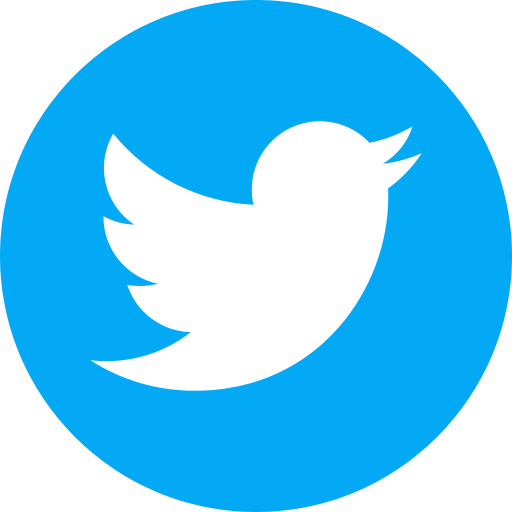
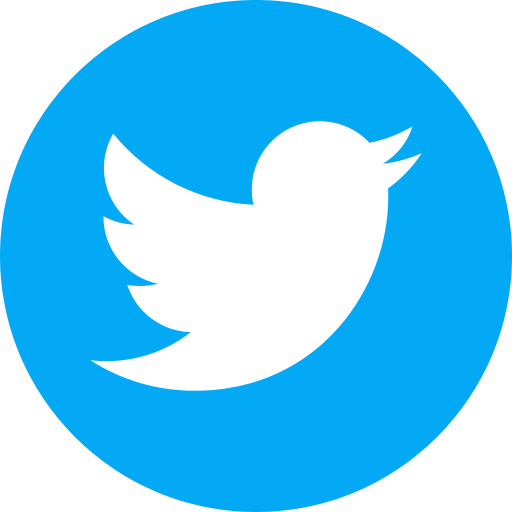
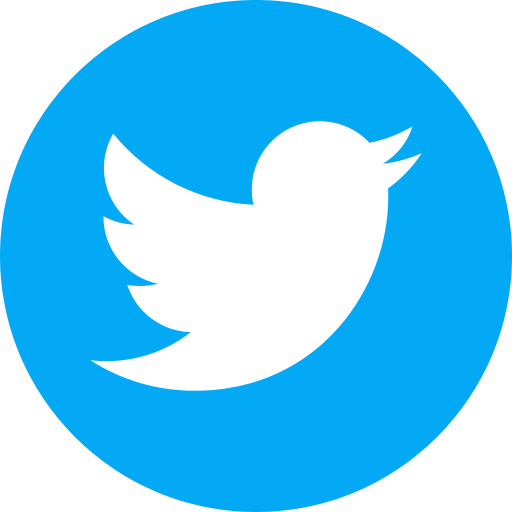
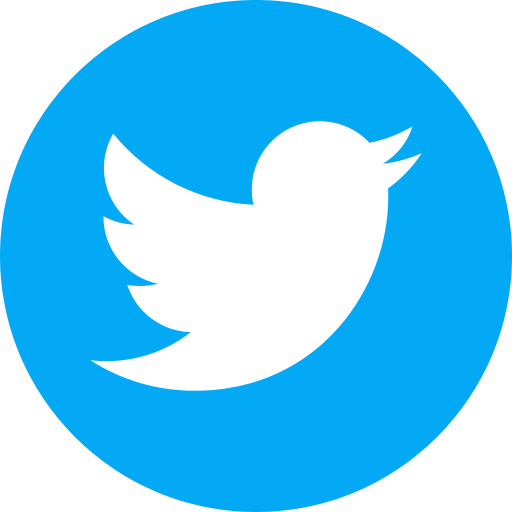
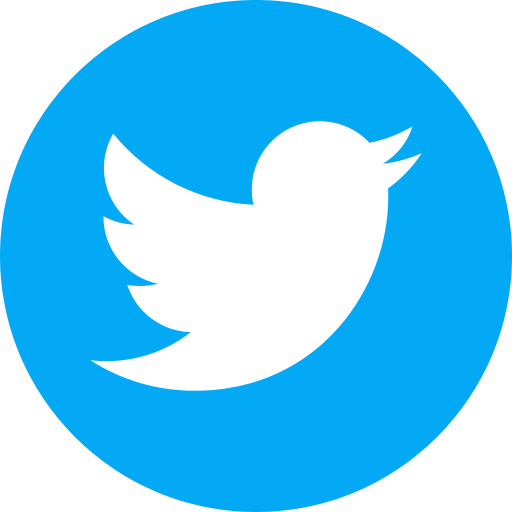
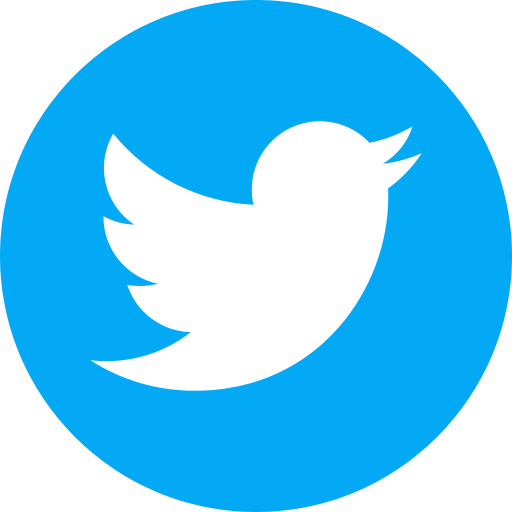
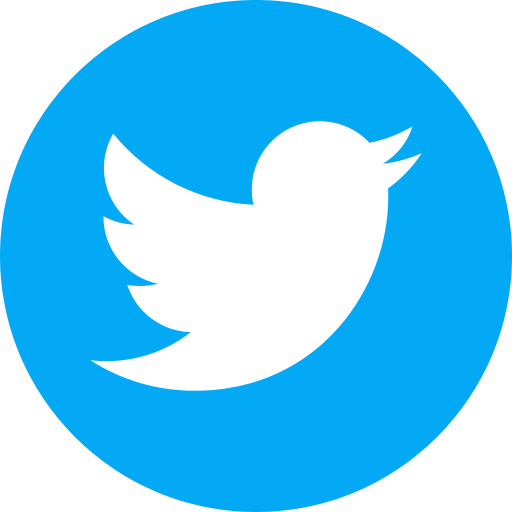
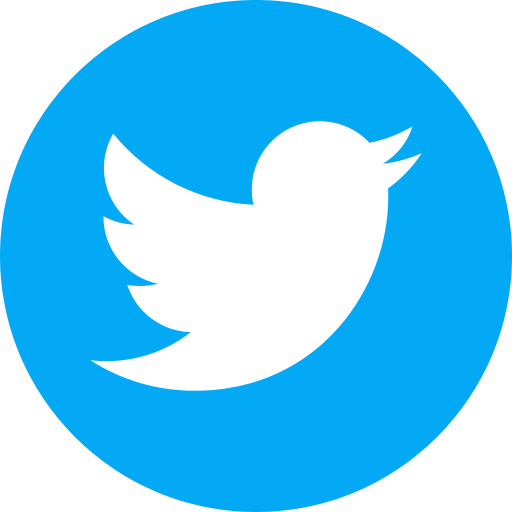
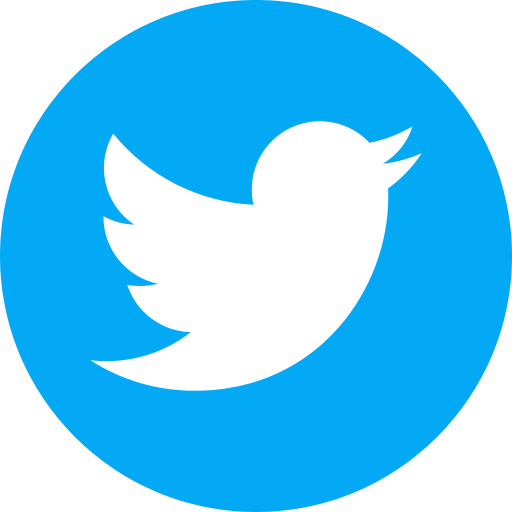
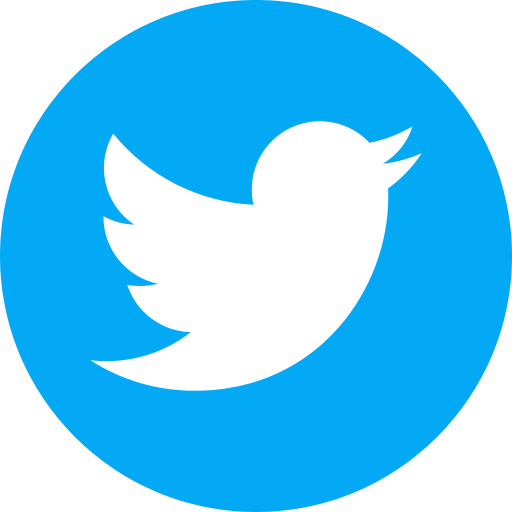
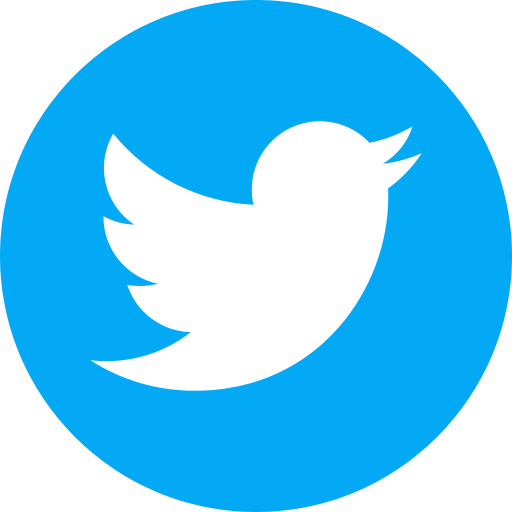
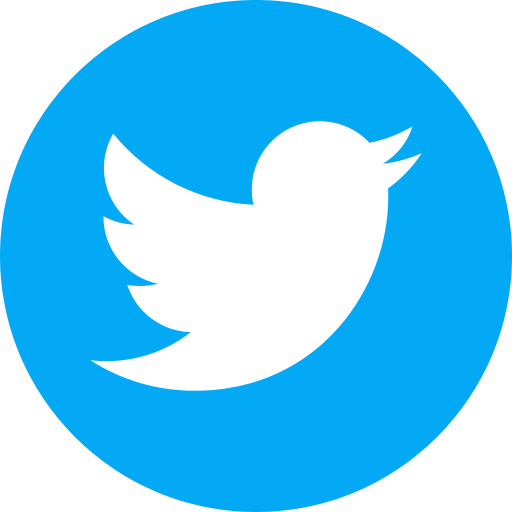
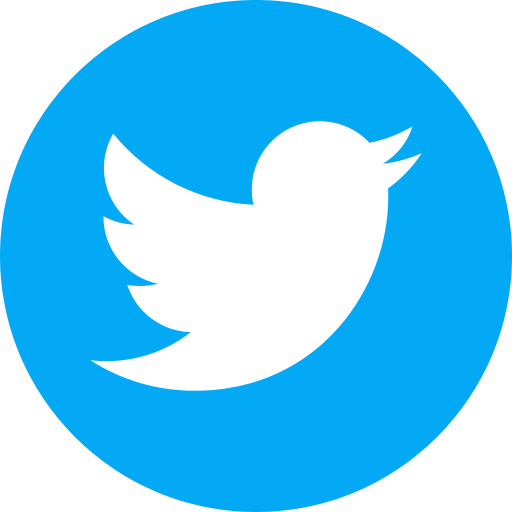
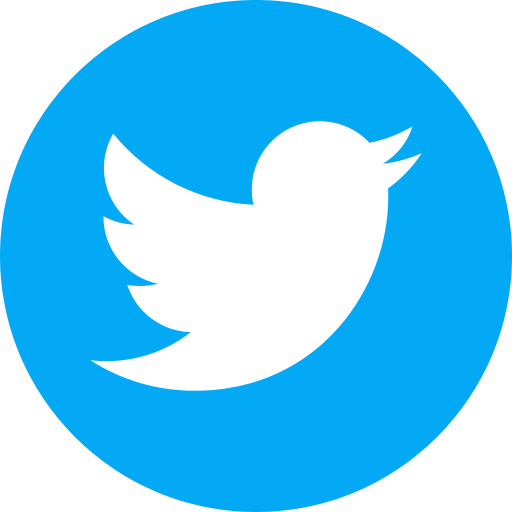
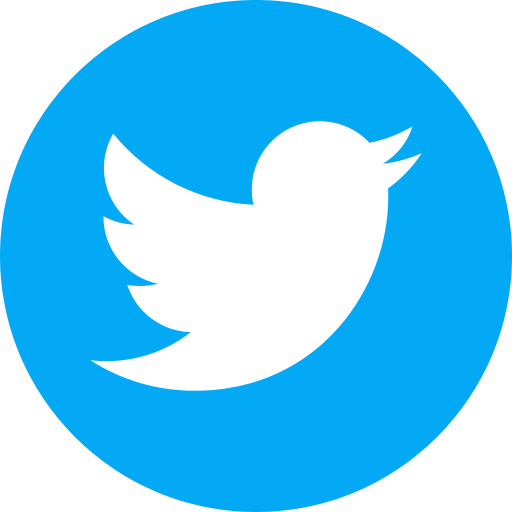
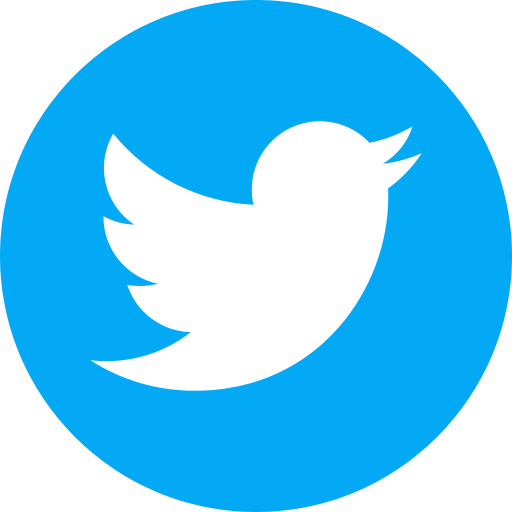
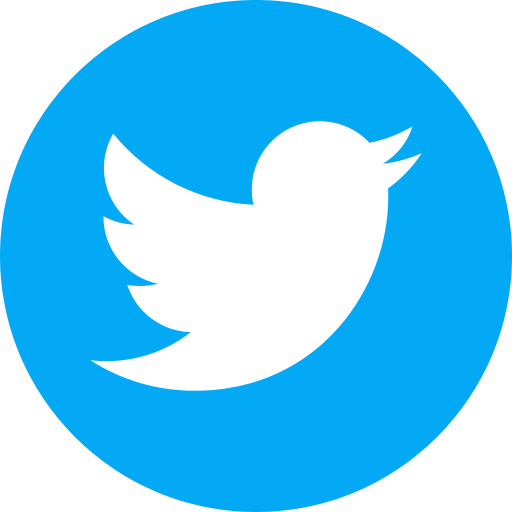
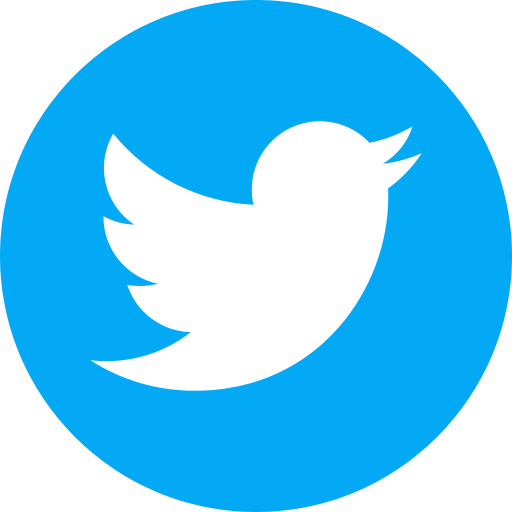
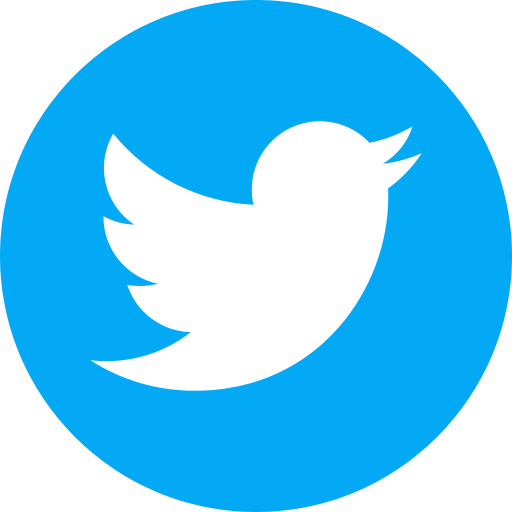
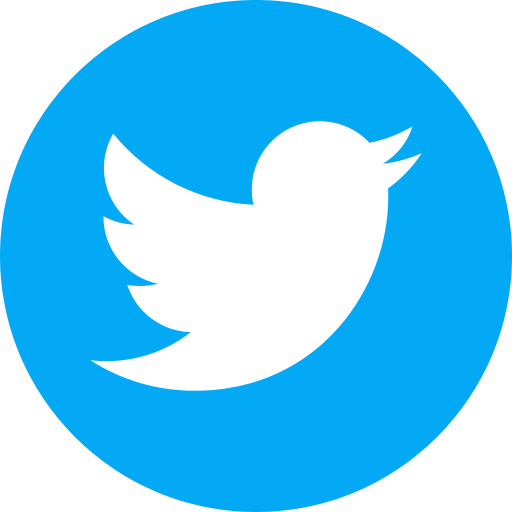
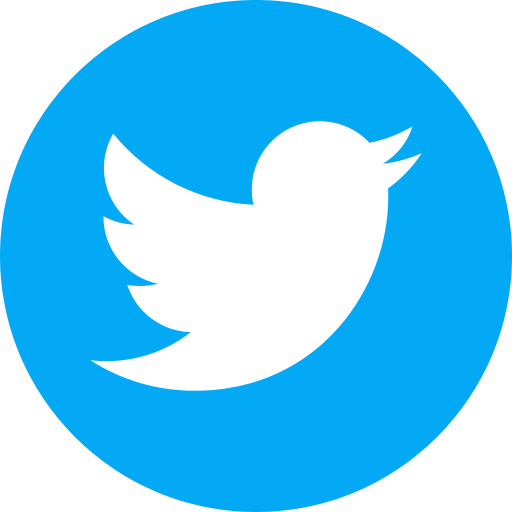
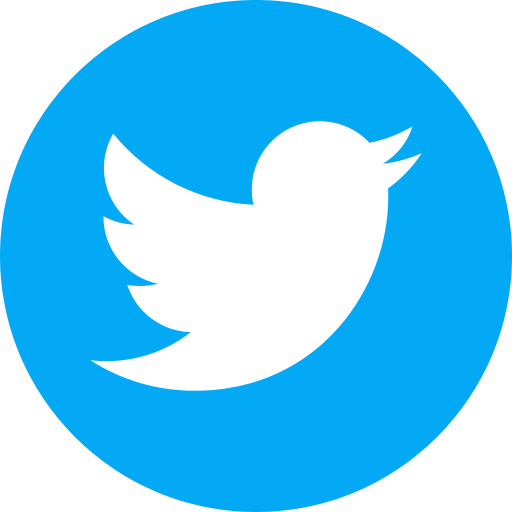
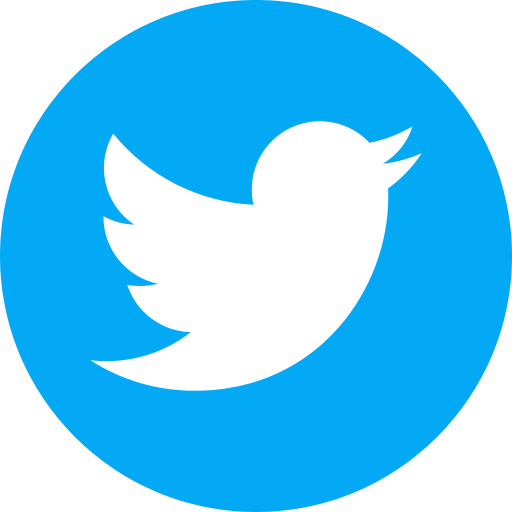
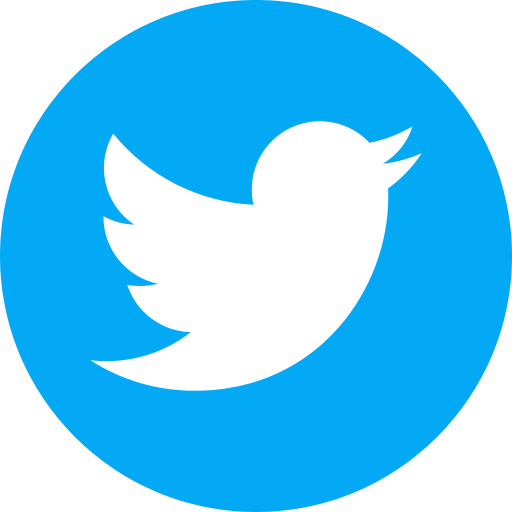
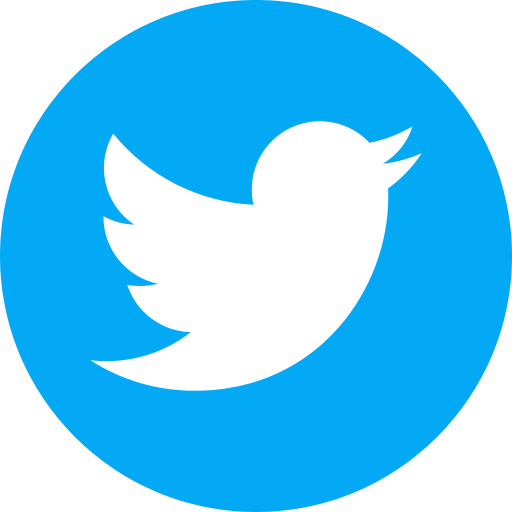
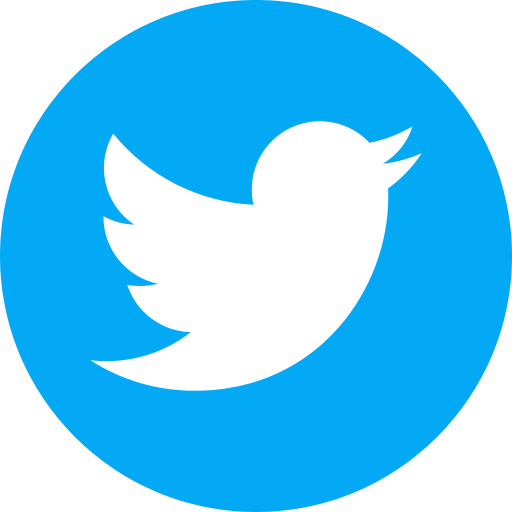
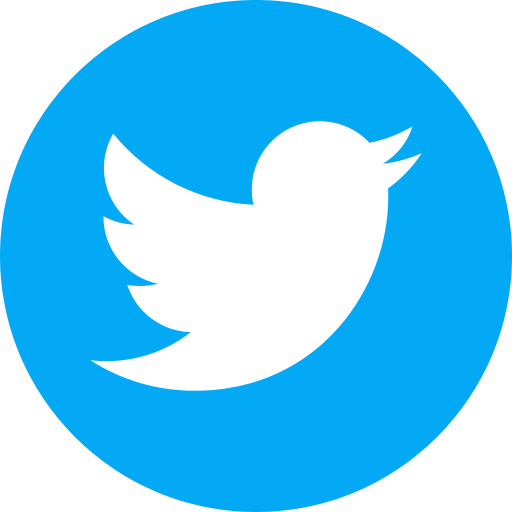
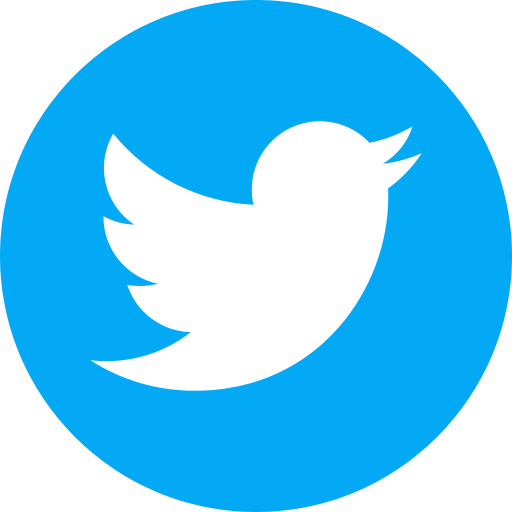
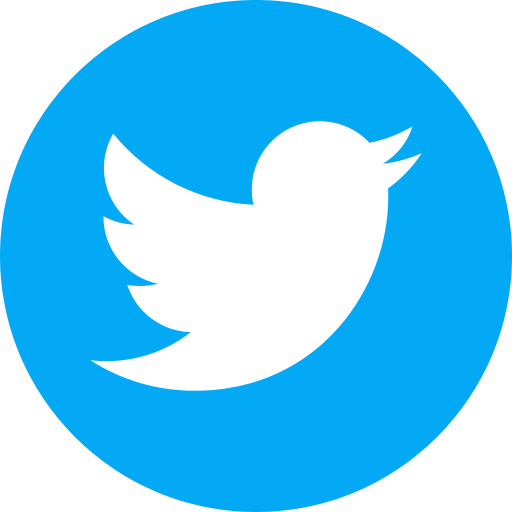
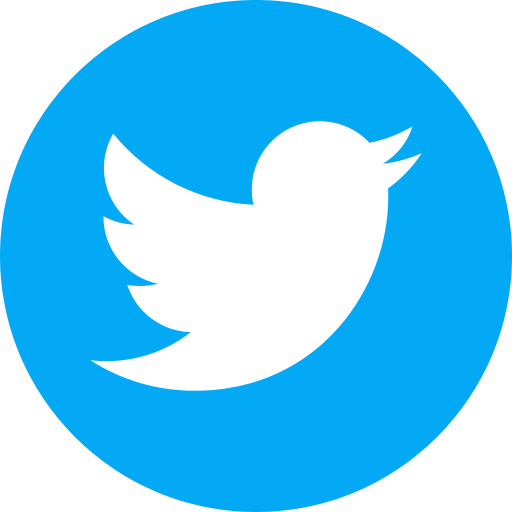
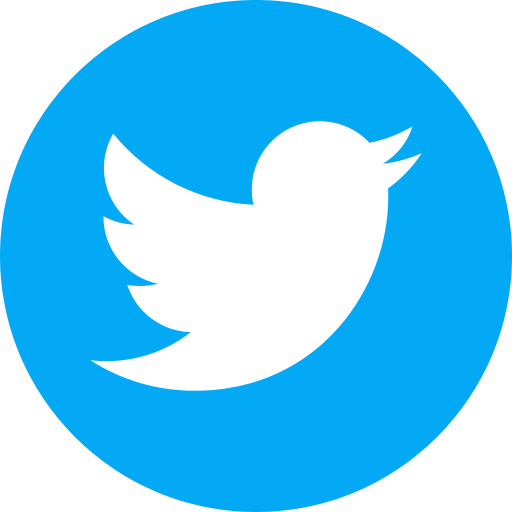
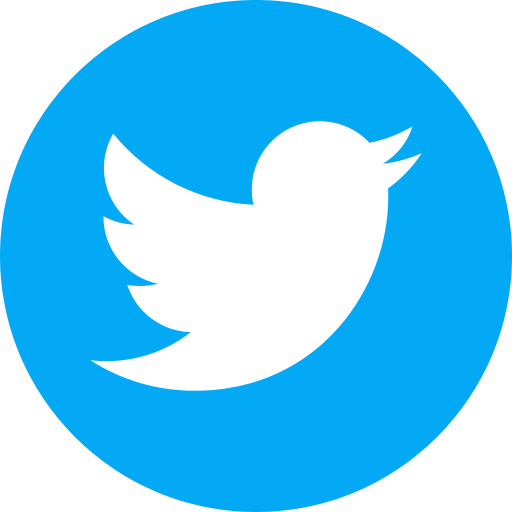
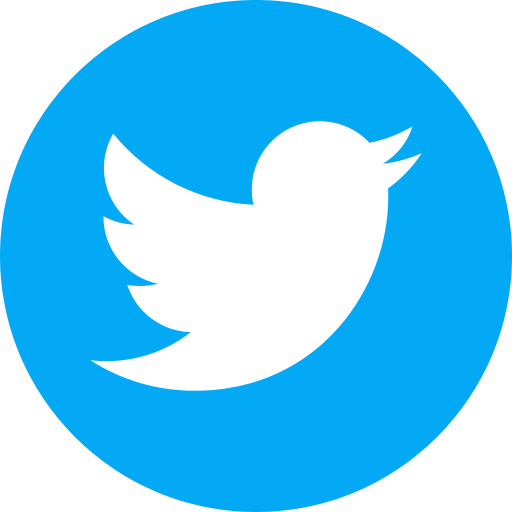
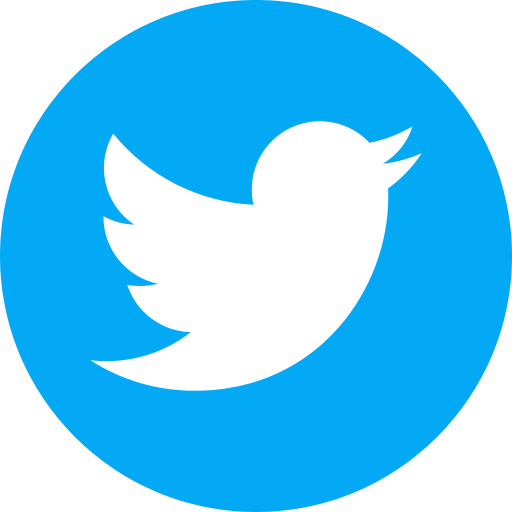
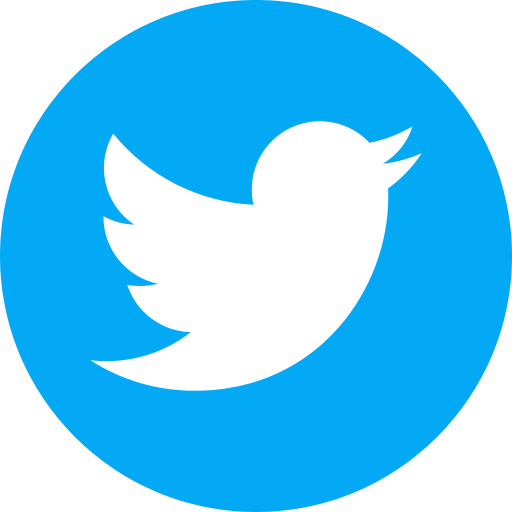
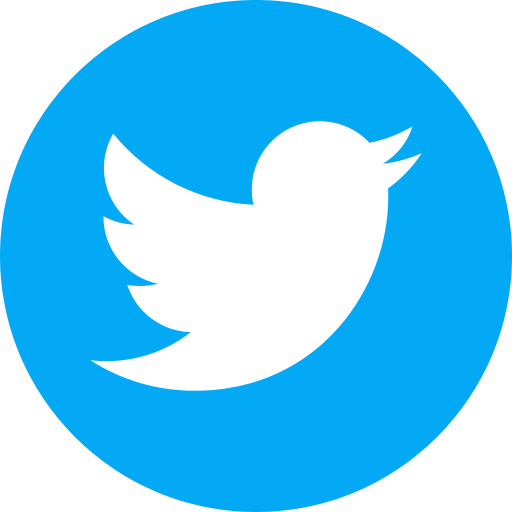
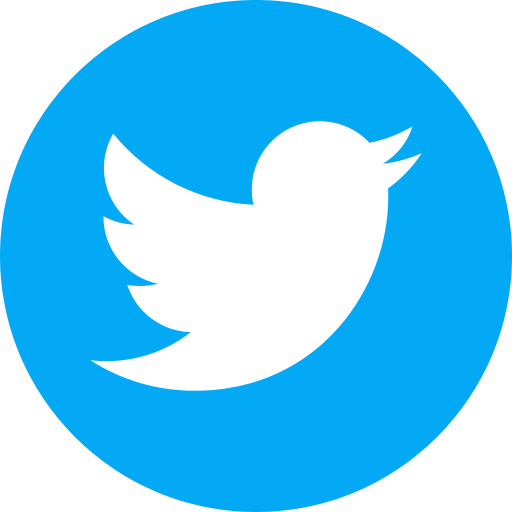
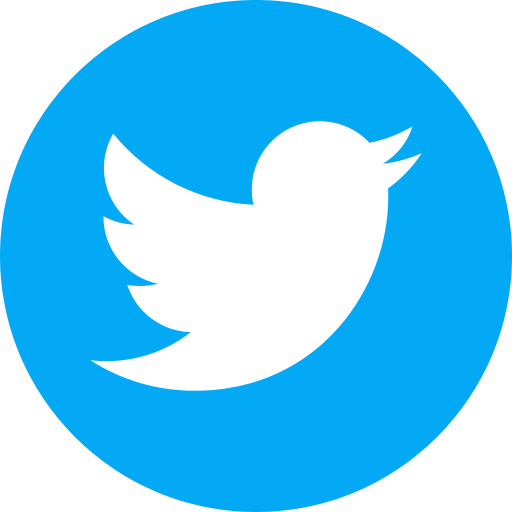
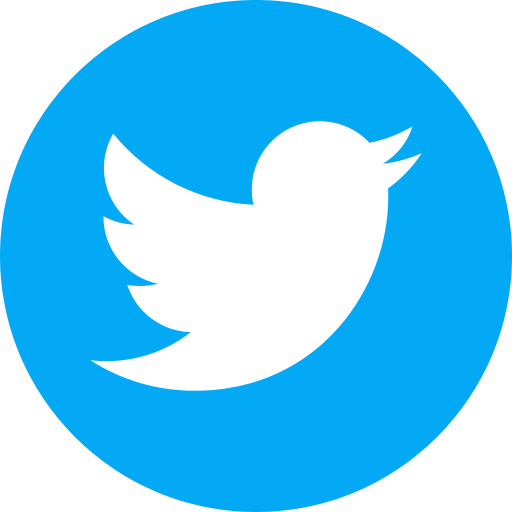
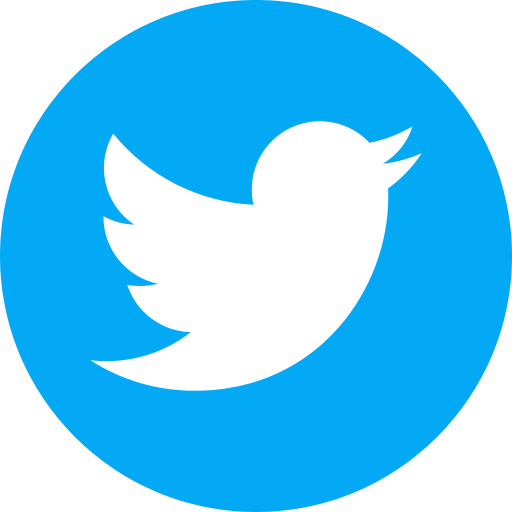
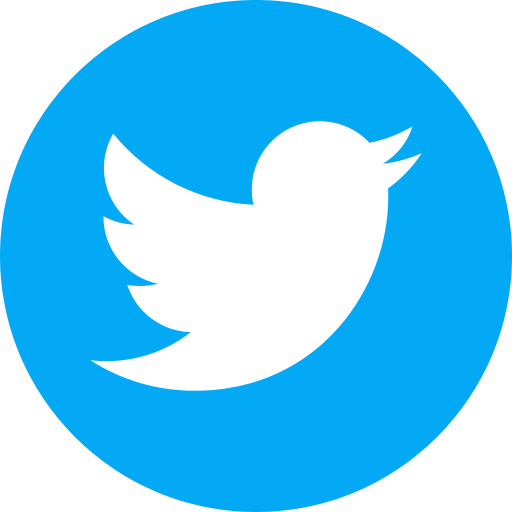
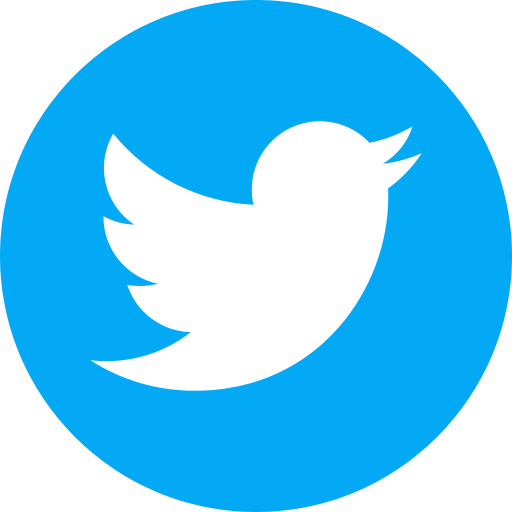
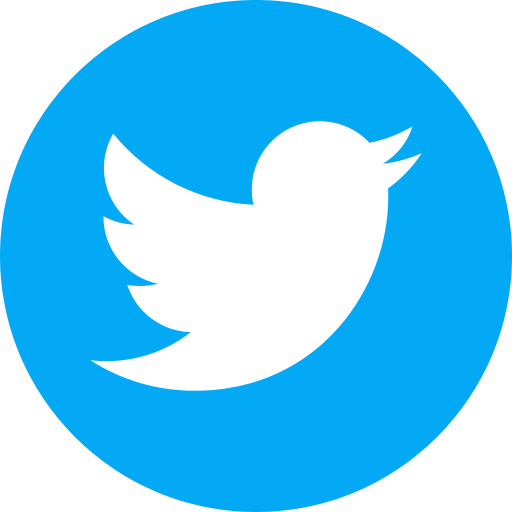
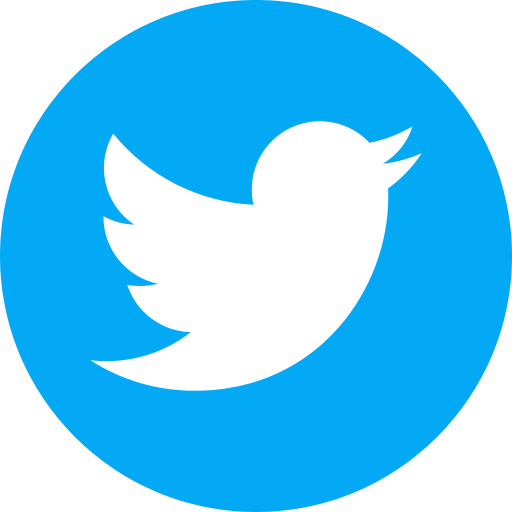
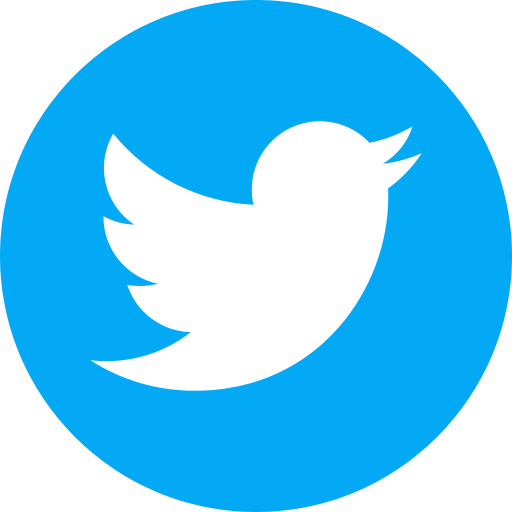
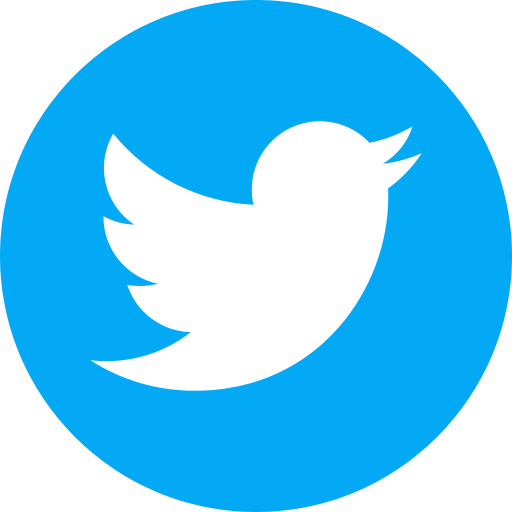
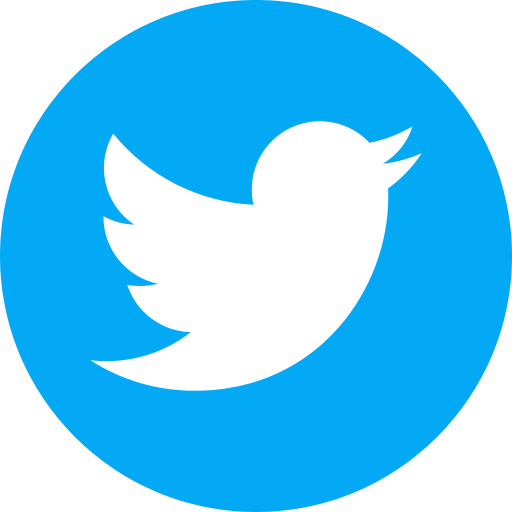
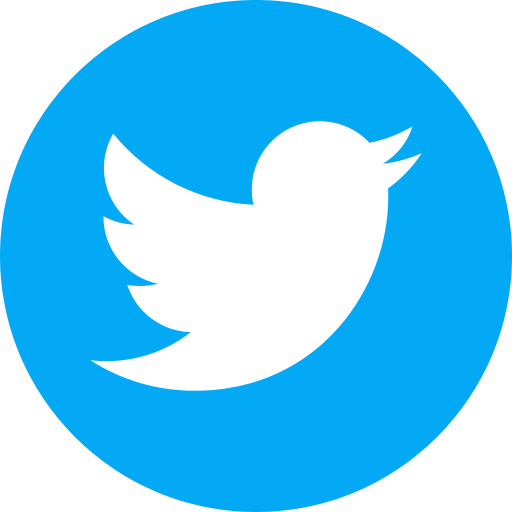
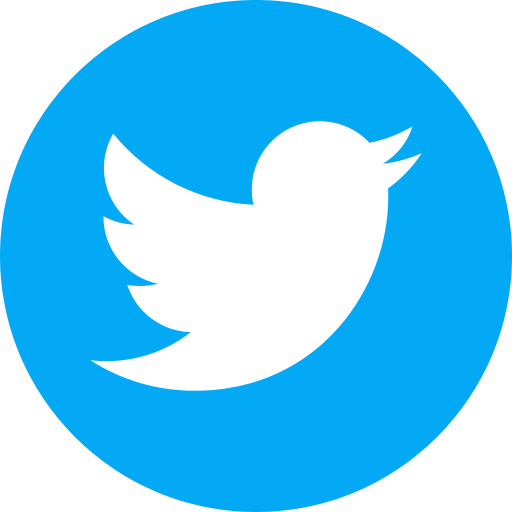
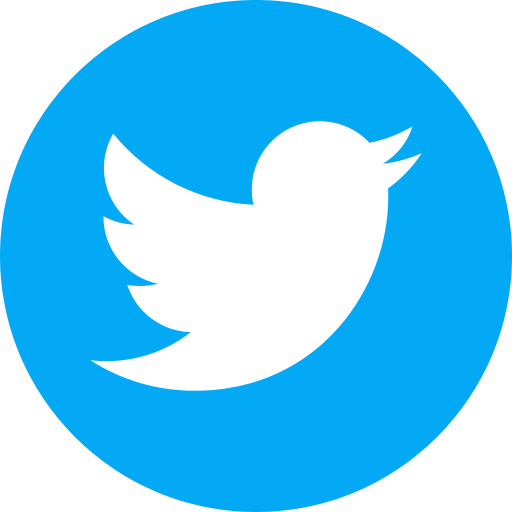
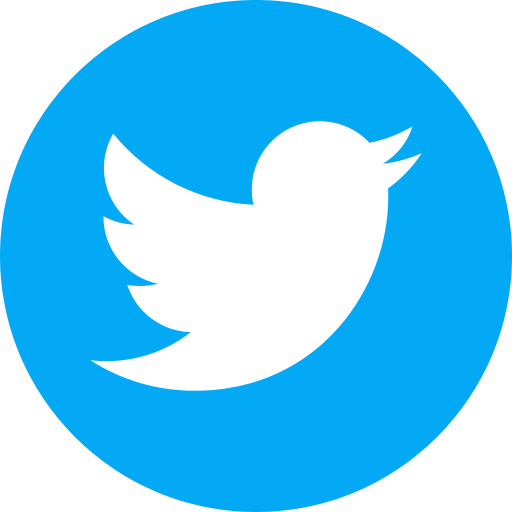
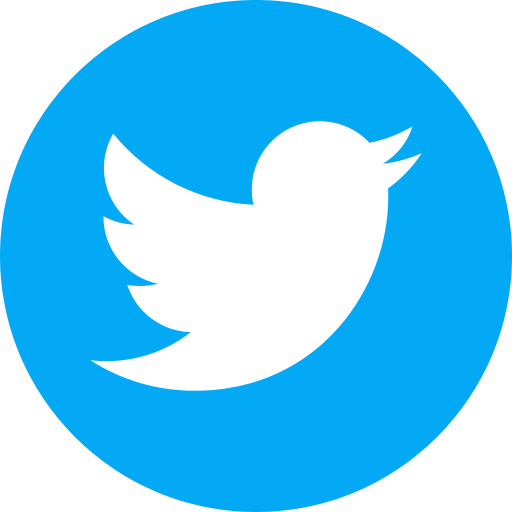
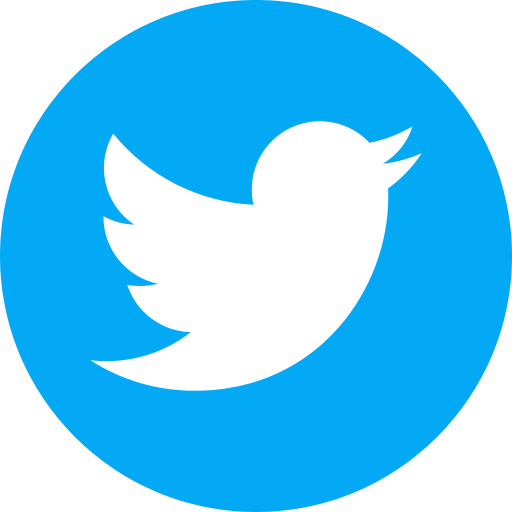
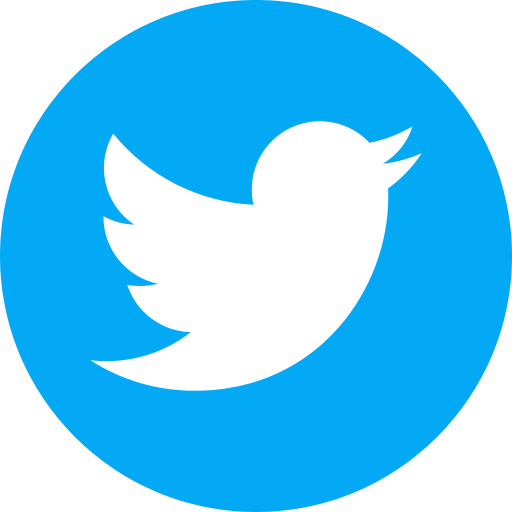
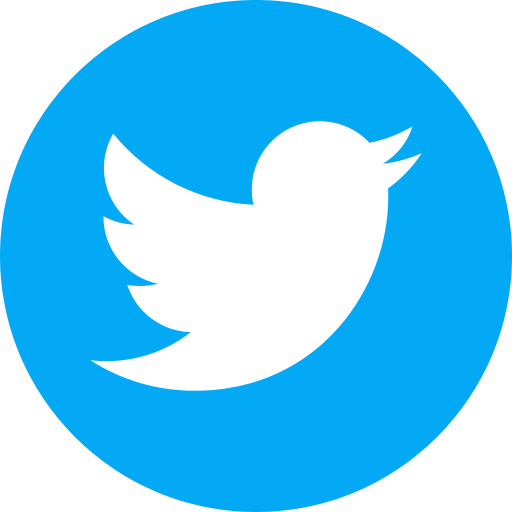
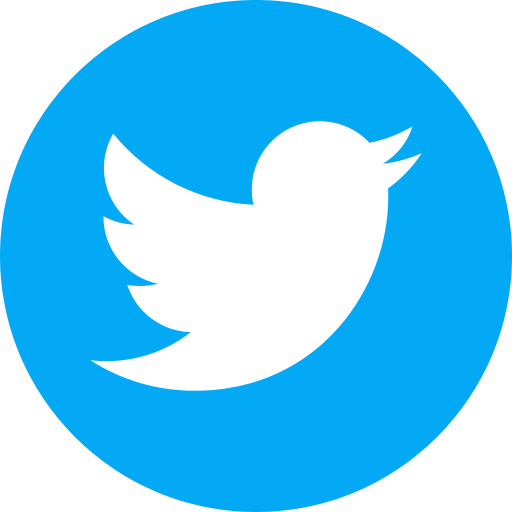
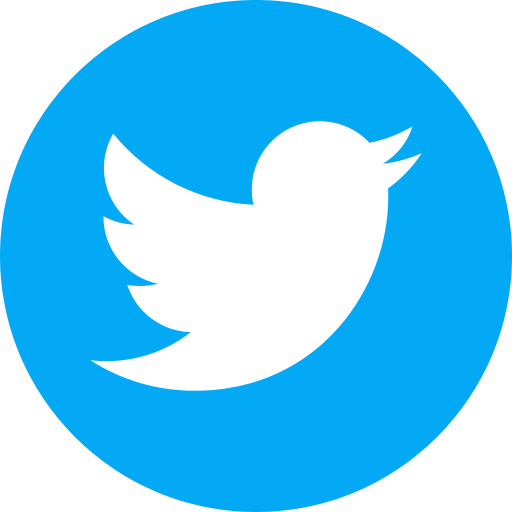
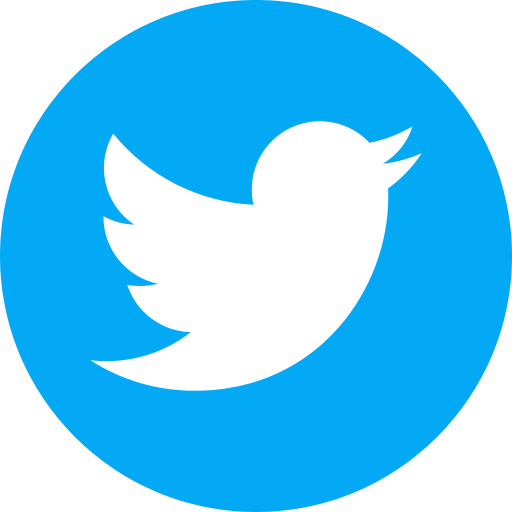
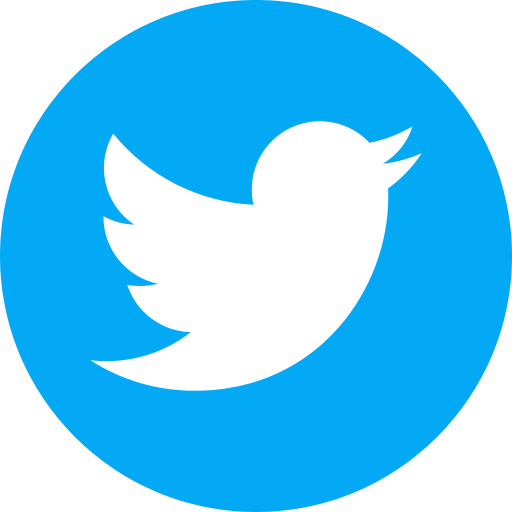
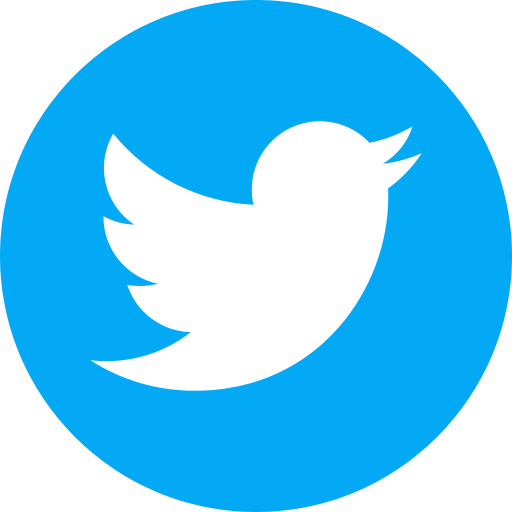
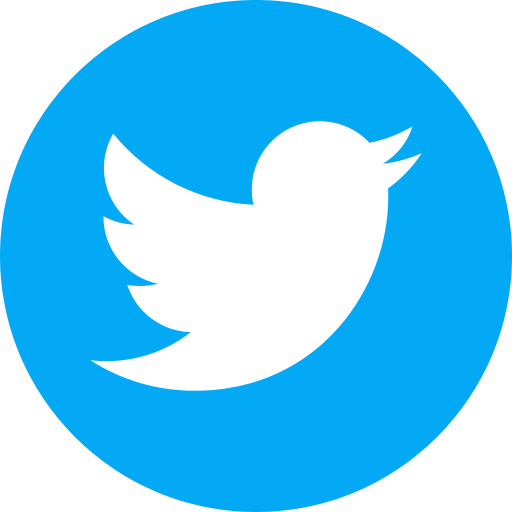
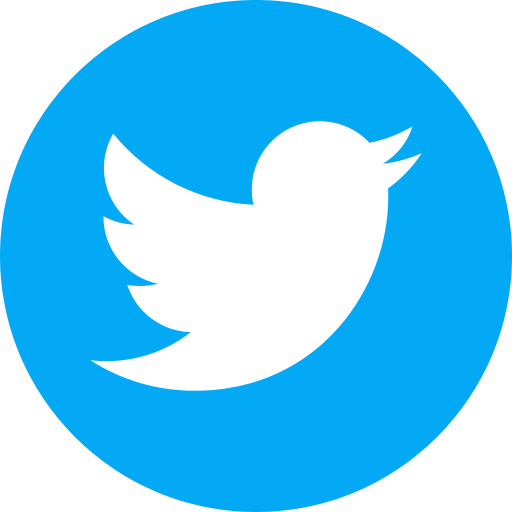
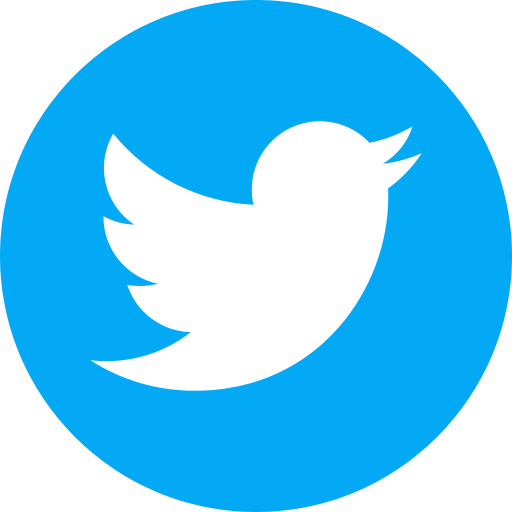
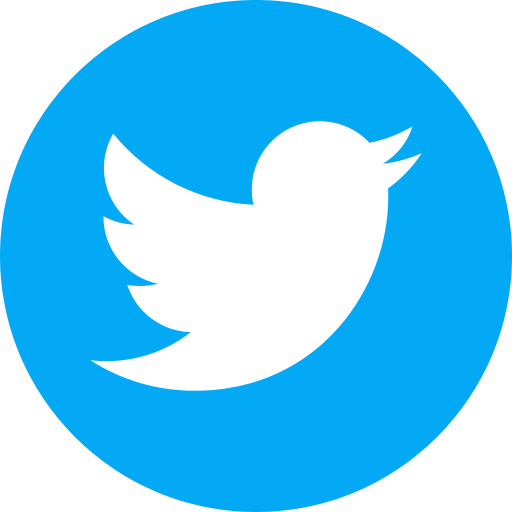
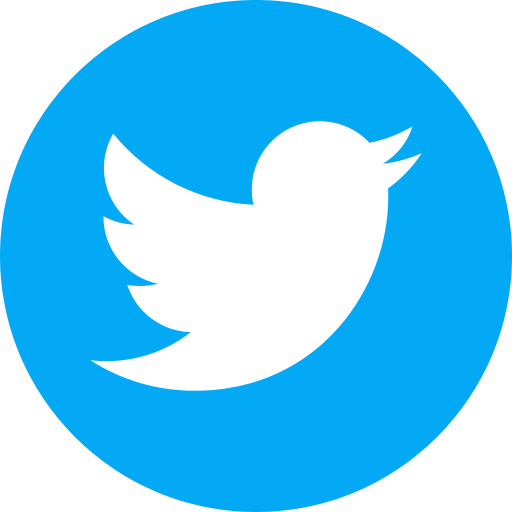
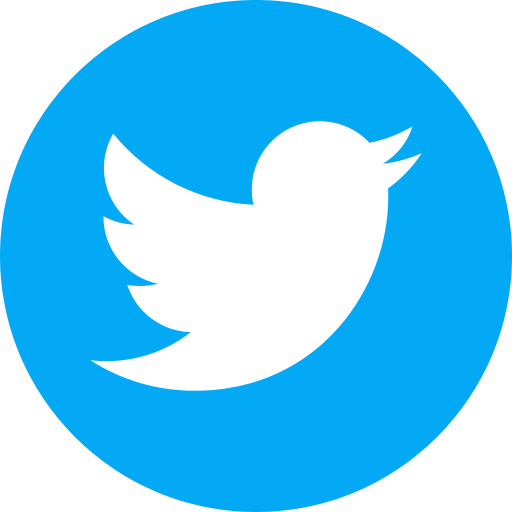
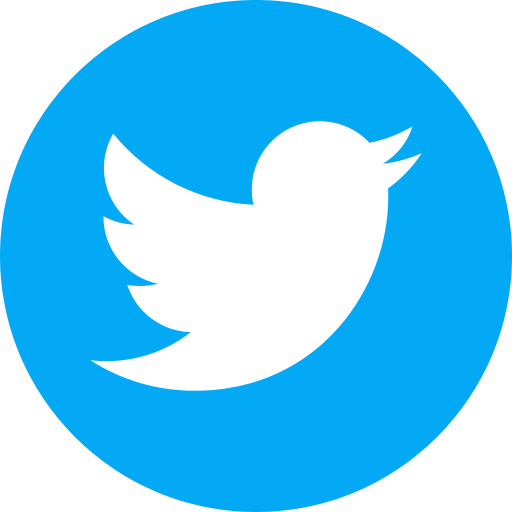
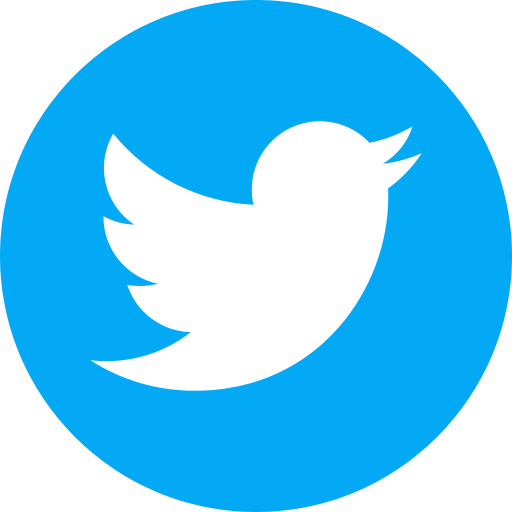
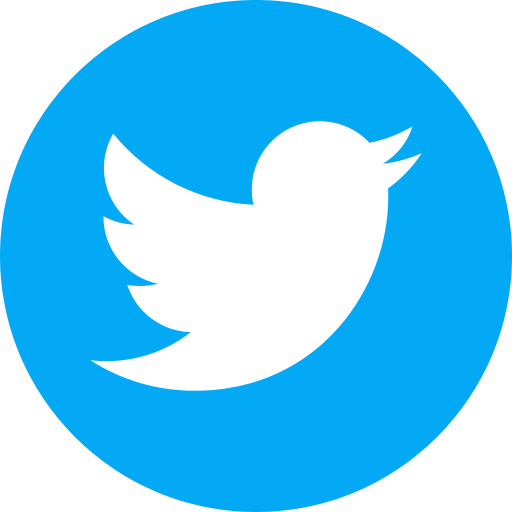
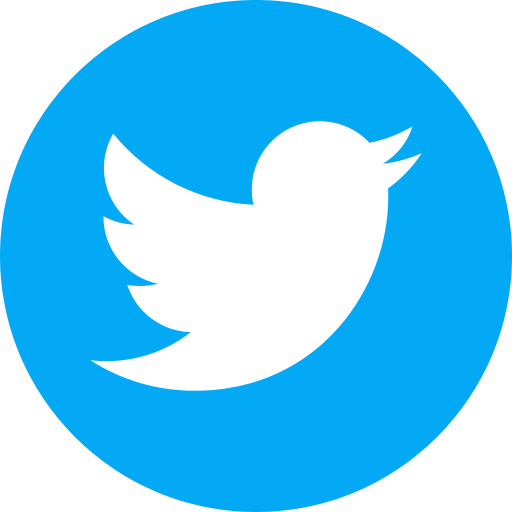
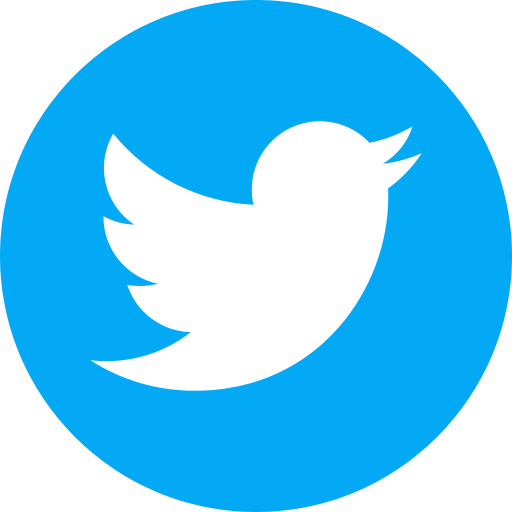

In [19]:
generateBaseMap('city',top100_city)

<h3 style="text-align: left; background-color: #9DBD48; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>Top 15  Username by Number of Tweets</b></h3>

In [20]:
# Top 15  user name by number of tweets 

import plotly.io as pio

pio.templates.default = "simple_white"

data_plot_Top15_user = df.groupby('user_name')['user_location'].count().reset_index()

data_plot_Top15_user = data_plot_Top15_user.sort_values(['user_location'])

data_plot_Top15_user = data_plot_Top15_user.tail(15)


fig = px.bar(data_plot_Top15_user, x='user_name', y='user_location',color='user_location',
            labels={'user_name':'Users','user_location':'Number of tweets'},
            title='Top 15 user by number of tweets',height=600)

fig.show()

<h3 style="text-align: left; background-color: #9DBD48; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>Tweets by Source</b></h3>

In [21]:
import plotly.express as px

# Assuming you have already calculated top10_source as a DataFrame
top10_source = df.source.value_counts().nlargest(10).reset_index()
top10_source.columns = ['Source', '# of Tweets']

# Create an interactive bar chart using Plotly Express
fig = px.bar(
    top10_source,
    x='Source',
    y='# of Tweets',
    title='Tweets by Source',
    labels={'# of Tweets': 'Number of Tweets'},
    text='# of Tweets',
)

# Customize the appearance of the chart
fig.update_traces(
    marker_color='lightblue',
    marker_line_color='darkblue',
    marker_line_width=1.5,
    textposition='outside',  # Display the number of tweets outside the bars
)

fig.update_xaxes(title_text='Source')
fig.update_yaxes(title_text='Number of Tweets')

fig.update_layout(
    title={'text': 'Tweets by Source', 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
    xaxis_title='Source',
    yaxis_title='Number of Tweets',
    xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
)

# Show the interactive chart
fig.show()

<a id="2.4"></a>
## <div style="text-align: left; background-color:#81B622; color: black; padding: 14px; line-height: 1;border-radius:10px"> Wordcloud</div>

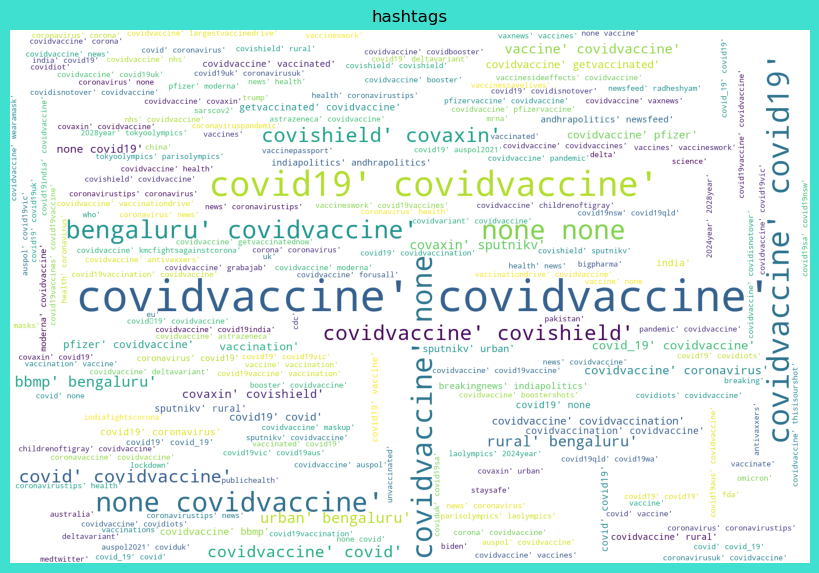

In [22]:
# Plotting hastags

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df['hashtags']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = '#40e0d0') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('hashtags')  
plt.show() 

<a id="2"></a>
# <div style="text-align: center; background-color: #00D100; color: black; padding: 14px; line-height: 1;border-radius:20px"> Text Preprocessing</div>

In [28]:
import re
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer

# Function to perform text preprocessing
def preprocess_text(text):
    # Text transformation to lowercase
    text = text.lower()

    # URL removal from text
    text = re.sub(r"http\S+", "", text)

    # Punctuation removal from text
    punctuation_removal = string.punctuation
    text = text.translate(str.maketrans('', '', punctuation_removal))

    # Single character and double space removal from the text
    text = re.sub(r'\s+[a-zA-Z]\s+', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Stopword removal from text
    STOPWORDS = set(stopwords.words('english'))
    text = " ".join([word for word in text.split() if word not in STOPWORDS])

    # Emoji Removal
    def remove_emoji(string):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002500-\U00002BEF"  # chinese char
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  # dingbats
            u"\u3030"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', string)

    text = str(text)
    text = remove_emoji(text)

    return text

# Apply the preprocessing function to the 'text' column of vaccine_data
df['text'] = df['text'].apply(preprocess_text)

# Display the resulting DataFrame
df['text']

0         australia manufacture covid19 vaccine give cit...
1         coronavirusvaccine coronavaccine covidvaccine ...
2         deaths due covid19 affected countries read rpi...
3         teamsubhashree subhashreesotwe iamrajchoco sta...
4         michellegrattan conversationedu passes leaders...
                                ...                        
399573    billgates billgatesbioterrorist billgatesbillg...
399574    incredible pfizer boss backtracking vaccines s...
399575    sask social services admits vaxxing kids sans ...
399576    pharmaceutical industry would never lie us pro...
399577    running money covidvaccine  covid19 covid covi...
Name: text, Length: 399578, dtype: object

In [29]:
# Apply the preprocessing function to a new column 'cleaned_text'
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Tokenization function
def tokenization(text):
    text = re.split('\W+', text)
    return text

# Remove stopwords function
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [word for word in text if word not in STOPWORDS]
    return text

# Stemming functions
ps = PorterStemmer()
def stemming_porter(text):
    text = [ps.stem(word) for word in text]
    return text

ss = SnowballStemmer(language='english')
def stemming_snowball(text):
    text = [ss.stem(word) for word in text]
    return text

# Lemmatization function
wn = WordNetLemmatizer()
def lemmatization(text):
    text = [wn.lemmatize(word) for word in text]
    return text

# Apply tokenization, stopword removal, stemming, and lemmatization to 'cleaned_text'
df['tokenized'] = df['cleaned_text'].apply(tokenization)
df['No_stopwords'] = df['tokenized'].apply(remove_stopwords)
df['stemmed_porter'] = df['No_stopwords'].apply(stemming_porter)
df['stemmed_snowball'] = df['No_stopwords'].apply(stemming_snowball)
df['lemmatized'] = df['No_stopwords'].apply(lemmatization)

# Displaying the required columns
selected_columns = df[['text', 'cleaned_text', 'tokenized', 'No_stopwords', 'stemmed_porter', 'stemmed_snowball', 'lemmatized']]

selected_columns.head(10)

text  \
0  australia manufacture covid19 vaccine give cit...   
1  coronavirusvaccine coronavaccine covidvaccine ...   
2  deaths due covid19 affected countries read rpi...   
3  teamsubhashree subhashreesotwe iamrajchoco sta...   
4  michellegrattan conversationedu passes leaders...   
5  multisystem inflammatory syndromechildren misc...   
6  privilrodrigues yatish57 deepkaranahuja shrist...   
7  msnbc well let’s qualify would anyone party ge...   
8  countries without ability make vaccines locall...   
9  dna zooms charts 1st week hear vaccines episod...   

                                        cleaned_text  \
0  australia manufacture covid19 vaccine give cit...   
1  coronavirusvaccine coronavaccine covidvaccine ...   
2  deaths due covid19 affected countries read rpi...   
3  teamsubhashree subhashreesotwe iamrajchoco sta...   
4  michellegrattan conversationedu passes leaders...   
5  multisystem inflammatory syndromechildren misc...   
6  privilrodrigues yatish57 deepkaranahuja shrist...   
7  msnbc well let’s qualify would anyone party ge...   
8  countries without ability make vaccines locall...   
9  dna zooms charts 1st week hear vaccines episod...   

                                           tokenized  \
0  [australia, manufacture, covid19, vaccine, giv...   
1  [coronavirusvaccine, coronavaccine, covidvacci...   
2  [deaths, due, covid19, affected, countries, re...   
3  [teamsubhashree, subhashreesotwe, iamrajchoco,...   
4  [michellegrattan, conversationedu, passes, lea...   
5  [multisystem, inflammatory, syndromechildren, ...   
6  [privilrodrigues, yatish57, deepkaranahuja, sh...   
7  [msnbc, well, let, s, qualify, would, anyone, ...   
8  [countries, without, ability, make, vaccines, ...   
9  [dna, zooms, charts, 1st, week, hear, vaccines...   

                                        No_stopwords  \
0  [australia, manufacture, covid19, vaccine, giv...   
1  [coronavirusvaccine, coronavaccine, covidvacci...   
2  [deaths, due, covid19, affected, countries, re...   
3  [teamsubhashree, subhashreesotwe, iamrajchoco,...   
4  [michellegrattan, conversationedu, passes, lea...   
5  [multisystem, inflammatory, syndromechildren, ...   
6  [privilrodrigues, yatish57, deepkaranahuja, sh...   
7  [msnbc, well, let, qualify, would, anyone, par...   
8  [countries, without, ability, make, vaccines, ...   
9  [dna, zooms, charts, 1st, week, hear, vaccines...   

                                      stemmed_porter  \
0  [australia, manufactur, covid19, vaccin, give,...   
1  [coronavirusvaccin, coronavaccin, covidvaccin,...   
2  [death, due, covid19, affect, countri, read, r...   
3  [teamsubhashre, subhashreesotw, iamrajchoco, s...   
4  [michellegrattan, conversationedu, pass, leade...   
5  [multisystem, inflammatori, syndromechildren, ...   
6  [privilrodrigu, yatish57, deepkaranahuja, shri...   
7  [msnbc, well, let, qualifi, would, anyon, part...   
8  [countri, without, abil, make, vaccin, local, ...   
9  [dna, zoom, chart, 1st, week, hear, vaccin, ep...   

                                    stemmed_snowball  \
0  [australia, manufactur, covid19, vaccin, give,...   
1  [coronavirusvaccin, coronavaccin, covidvaccin,...   
2  [death, due, covid19, affect, countri, read, r...   
3  [teamsubhashre, subhashreesotw, iamrajchoco, s...   
4  [michellegrattan, conversationedu, pass, leade...   
5  [multisystem, inflammatori, syndromechildren, ...   
6  [privilrodrigu, yatish57, deepkaranahuja, shri...   
7  [msnbc, well, let, qualifi, would, anyon, part...   
8  [countri, without, abil, make, vaccin, local, ...   
9  [dna, zoom, chart, 1st, week, hear, vaccin, ep...   

                                          lemmatized  
0  [australia, manufacture, covid19, vaccine, giv...  
1  [coronavirusvaccine, coronavaccine, covidvacci...  
2  [death, due, covid19, affected, country, read,...  
3  [teamsubhashree, subhashreesotwe, iamrajchoco,...  
4  [michellegrattan, conversationedu, pass, leade...  
5  [multisystem,

<a id="2"></a>
# <div style="text-align: center; background-color: #00D100; color: black; padding: 14px; line-height: 1;border-radius:20px"> Sentiment Analysis</div>

In [30]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Convert the 'text' column to strings
df['text'] = df['text'].astype(str)

# Define a function to get sentiment labels
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [31]:
# Add a new column 'Sentiments' based on sentiment analysis
df['Sentiments'] = df['text'].apply(get_sentiment)

# Displaying the required columns
selected_columns = df[['text', 'cleaned_text', 'tokenized', 'No_stopwords', 'stemmed_porter', 'stemmed_snowball', 'lemmatized', 'Sentiments']]

selected_columns.head(10)

text  \
0  australia manufacture covid19 vaccine give cit...   
1  coronavirusvaccine coronavaccine covidvaccine ...   
2  deaths due covid19 affected countries read rpi...   
3  teamsubhashree subhashreesotwe iamrajchoco sta...   
4  michellegrattan conversationedu passes leaders...   
5  multisystem inflammatory syndromechildren misc...   
6  privilrodrigues yatish57 deepkaranahuja shrist...   
7  msnbc well let’s qualify would anyone party ge...   
8  countries without ability make vaccines locall...   
9  dna zooms charts 1st week hear vaccines episod...   

                                        cleaned_text  \
0  australia manufacture covid19 vaccine give cit...   
1  coronavirusvaccine coronavaccine covidvaccine ...   
2  deaths due covid19 affected countries read rpi...   
3  teamsubhashree subhashreesotwe iamrajchoco sta...   
4  michellegrattan conversationedu passes leaders...   
5  multisystem inflammatory syndromechildren misc...   
6  privilrodrigues yatish57 deepkaranahuja shrist...   
7  msnbc well let’s qualify would anyone party ge...   
8  countries without ability make vaccines locall...   
9  dna zooms charts 1st week hear vaccines episod...   

                                           tokenized  \
0  [australia, manufacture, covid19, vaccine, giv...   
1  [coronavirusvaccine, coronavaccine, covidvacci...   
2  [deaths, due, covid19, affected, countries, re...   
3  [teamsubhashree, subhashreesotwe, iamrajchoco,...   
4  [michellegrattan, conversationedu, passes, lea...   
5  [multisystem, inflammatory, syndromechildren, ...   
6  [privilrodrigues, yatish57, deepkaranahuja, sh...   
7  [msnbc, well, let, s, qualify, would, anyone, ...   
8  [countries, without, ability, make, vaccines, ...   
9  [dna, zooms, charts, 1st, week, hear, vaccines...   

                                        No_stopwords  \
0  [australia, manufacture, covid19, vaccine, giv...   
1  [coronavirusvaccine, coronavaccine, covidvacci...   
2  [deaths, due, covid19, affected, countries, re...   
3  [teamsubhashree, subhashreesotwe, iamrajchoco,...   
4  [michellegrattan, conversationedu, passes, lea...   
5  [multisystem, inflammatory, syndromechildren, ...   
6  [privilrodrigues, yatish57, deepkaranahuja, sh...   
7  [msnbc, well, let, qualify, would, anyone, par...   
8  [countries, without, ability, make, vaccines, ...   
9  [dna, zooms, charts, 1st, week, hear, vaccines...   

                                      stemmed_porter  \
0  [australia, manufactur, covid19, vaccin, give,...   
1  [coronavirusvaccin, coronavaccin, covidvaccin,...   
2  [death, due, covid19, affect, countri, read, r...   
3  [teamsubhashre, subhashreesotw, iamrajchoco, s...   
4  [michellegrattan, conversationedu, pass, leade...   
5  [multisystem, inflammatori, syndromechildren, ...   
6  [privilrodrigu, yatish57, deepkaranahuja, shri...   
7  [msnbc, well, let, qualifi, would, anyon, part...   
8  [countri, without, abil, make, vaccin, local, ...   
9  [dna, zoom, chart, 1st, week, hear, vaccin, ep...   

                                    stemmed_snowball  \
0  [australia, manufactur, covid19, vaccin, give,...   
1  [coronavirusvaccin, coronavaccin, covidvaccin,...   
2  [death, due, covid19, affect, countri, read, r...   
3  [teamsubhashre, subhashreesotw, iamrajchoco, s...   
4  [michellegrattan, conversationedu, pass, leade...   
5  [multisystem, inflammatori, syndromechildren, ...   
6  [privilrodrigu, yatish57, deepkaranahuja, shri...   
7  [msnbc, well, let, qualifi, would, anyon, part...   
8  [countri, without, abil, make, vaccin, local, ...   
9  [dna, zoom, chart, 1st, week, hear, vaccin, ep...   

                                          lemmatized Sentiments  
0  [australia, manufacture, covid19, vaccine, giv...   Positive  
1  [coronavirusvaccine, coronavaccine, covidvacci...   Positive  
2  [death, due, covid19, affected, country, read,...   Negative  
3  [teamsubhashree, subhashreesotwe, iamrajchoco,...   Positive  
4  [michellegrat

In [32]:
import plotly.express as px

# Count the number of instances for each sentiment category
sentiment_counts = df["Sentiments"].value_counts().reset_index()

# Rename the columns for clarity
sentiment_counts.columns = ["Sentiment", "Count"]

# Create an interactive pie chart using Plotly
fig = px.pie(sentiment_counts, values="Count", names="Sentiment", title="Sentiment Distribution")
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1])  # Add percentage labels and separate a slice

# Show the interactive pie chart
fig.show()


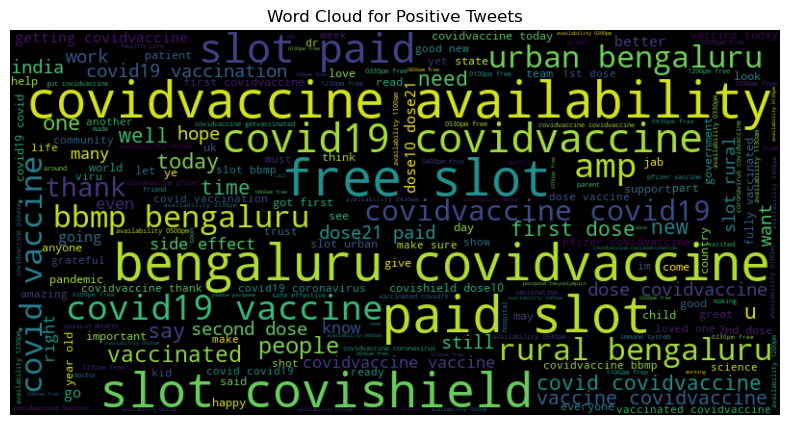

In [33]:
# Combine all words from positive sentiments
positive_words = []
for words_list in df[df['Sentiments'] == 'Positive']['lemmatized']:
    positive_words.extend(words_list)

# Create a space-separated string of positive words
positive_text = ' '.join(positive_words)

# Generate the word cloud with a title
wordcloud = WordCloud(
    background_color='black',
    colormap='viridis',
    width=800,
    height=400
)
wordcloud.generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Tweets')
plt.axis('off')
plt.show()

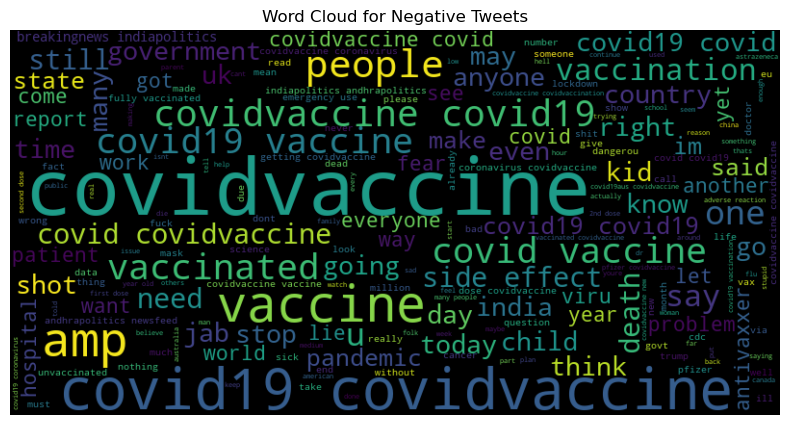

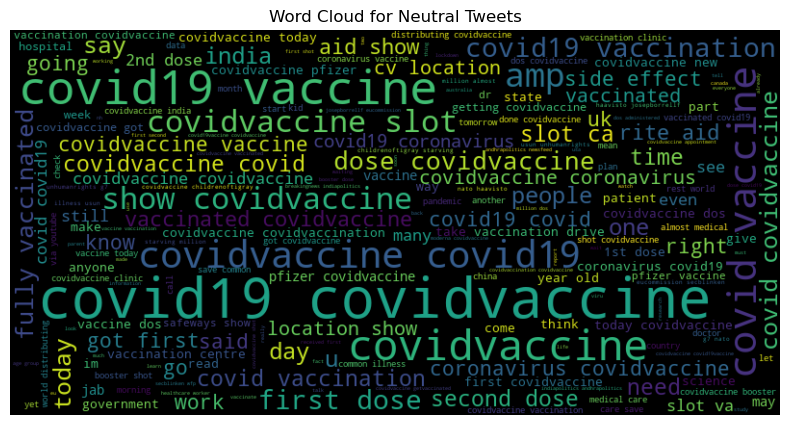

In [34]:
# Function to generate and display a word cloud
def generate_word_cloud(sentiment):
    words = []
    for words_list in df[df['Sentiments'] == sentiment]['lemmatized']:
        words.extend(words_list)
    
    text = ' '.join(words)
    
    wordcloud = WordCloud(
        background_color='black',
        colormap='viridis',
        width=800,
        height=400
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.axis('off')
    plt.show()

# Generate word clouds separately for negative and neutral sentiments
generate_word_cloud('Negative')
generate_word_cloud('Neutral')

<a id="2"></a>
# <div style="text-align: center; background-color: #00D100; color: black; padding: 14px; line-height: 1;border-radius:20px"> Text Clustering</div>

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'text' column contains the text data in your DataFrame
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each text in the 'text' column
sentiment_scores = df['text'].apply(lambda x: sid.polarity_scores(x))

# Create a DataFrame from the sentiment scores
sent_scores_df = pd.DataFrame(list(sentiment_scores))

In [43]:
# Assuming 'date' column contains the date information in your DataFrame
sentiments_time_df = pd.DataFrame()
sentiments_time_df['time'] = df['date']  # Assuming 'date' column contains the date information

# Filter out non-date strings from the 'date' column
sentiments_time_df = sentiments_time_df[pd.to_datetime(sentiments_time_df['time'], errors='coerce').notnull()]

# Convert 'time' column to datetime
sentiments_time_df['time'] = pd.to_datetime(sentiments_time_df['time'])

# Set the DataFrame index to the 'time' column
sentiments_time_df.index = sentiments_time_df['time']

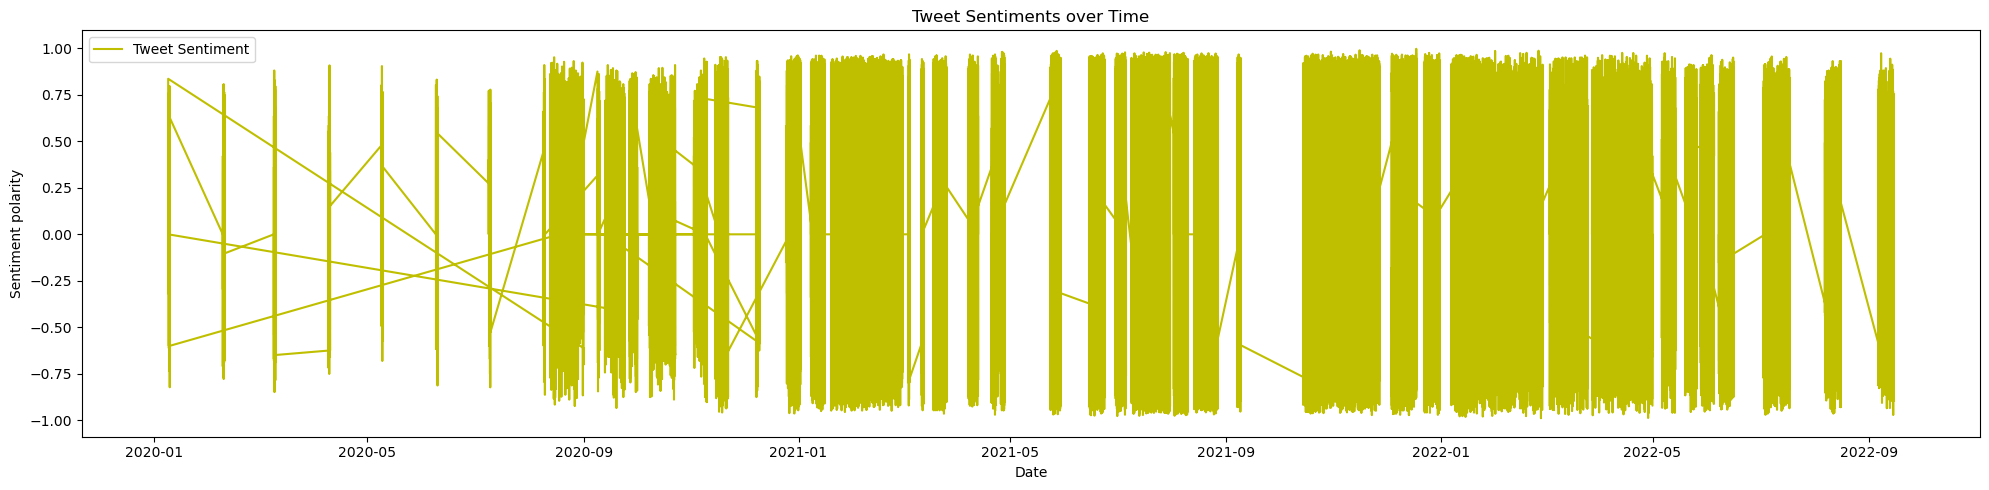

In [59]:
# Assuming 'compound' column contains the compound sentiment scores in your sent_scores_df DataFrame

# Create the plot using Matplotlib
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
ax.plot(sentiments_time_df.index, sent_scores_df['compound'], label='Tweet Sentiment', color='y')
ax.set(title='Tweet Sentiments over Time', xlabel='Date', ylabel='Sentiment polarity')
ax.legend(loc='best')
fig.tight_layout()

# Show the plot
plt.show()


In [76]:
from afinn import Afinn

# Initialize the Afinn sentiment analyzer
afinn_scorer = Afinn()

# Join the lemmatized words into a single string
df['lemmatized_text'] = df['lemmatized'].apply(lambda x: ' '.join(x))

# Apply the Afinn sentiment analysis to the joined text
df['score'] = df['lemmatized_text'].map(afinn_scorer.score).astype(int)

# Filter rows with non-zero sentiment scores
df_score = df[df['score'] != 0]

In [77]:
score_freq = df_score.score.value_counts().sort_index().to_frame('n')

score_freq

n
-46      1
-32      1
-29      1
-25      1
-24      2
-23      1
-22      6
-21     13
-20      8
-19     11
-18     16
-17     19
-16     66
-15     50
-14     85
-13    105
-12    232
-11    282
-10    539
-9     865
-8    1443
-7    2000
-6    3569
-5    5605
-4    9167
-3   14495
-2   28871
-1   21281
 1   52299
 2   43806
 3   25394
 4   14745
 5    8315
 6    5359
 7    2929
 8    1760
 9     968
 10    587
 11    323
 12    203
 13     98
 14     63
 15     43
 16     14
 17     14
 18     11
 19      4
 20      3
 21      2
 22      3
 24      1
 30      2

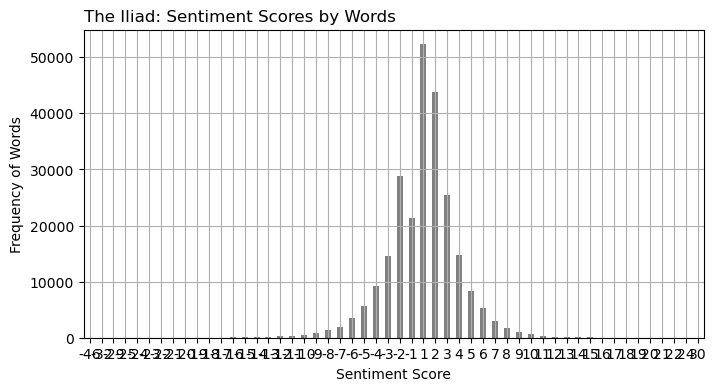

In [78]:
score_freq.plot.bar(
    legend=False,
    figsize=(8, 4),
    grid=True,
    color='gray')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency of Words')
plt.title('The Iliad: Sentiment Scores by Words', loc='left')
plt.xticks(rotation=0);

In [79]:
df['line'] = range(1, len(df) + 1)

df.head()

user_name              user_location  \
0                 MyNewsNE                      Assam   
1            Shubham Gupta                    Unknown   
2  Journal of Infectiology                    Unknown   
3                     Zane                    Unknown   
4       Ann-Maree O’Connor  Adelaide, South Australia   

                                    user_description      user_created  \
0  MyNewsNE a dedicated multi-lingual media house...  24-05-2020 10:18   
1  I will tell about all experiences of my life f...  14-08-2020 16:42   
2  Journal of Infectiology (ISSN 2689-9981) is ac...  14-12-2017 07:07   
3                                  Fresher than you.  18-09-2019 11:01   
4  Retired university administrator. Melburnian b...  24-01-2013 14:53   

   user_followers user_friends user_favourites user_verified  \
0            64.0         11.0           110.0         False   
1             1.0         17.0             0.0         False   
2           143.0        566.0             8.0         False   
3            29.0         25.0           620.0         False   
4            83.0        497.0         10737.0         False   

               date                                               text  ...  \
0  18-08-2020 12:55  australia manufacture covid19 vaccine give cit...  ...   
1  18-08-2020 12:55  coronavirusvaccine coronavaccine covidvaccine ...  ...   
2  18-08-2020 12:46  deaths due covid19 affected countries read rpi...  ...   
3  18-08-2020 12:45  teamsubhashree subhashreesotwe iamrajchoco sta...  ...   
4  18-08-2020 12:45  michellegrattan conversationedu passes leaders...  ...   

                                        cleaned_text  \
0  australia manufacture covid19 vaccine give cit...   
1  coronavirusvaccine coronavaccine covidvaccine ...   
2  deaths due covid19 affected countries read rpi...   
3  teamsubhashree subhashreesotwe iamrajchoco sta...   
4  michellegrattan conversationedu passes leaders...   

                                           tokenized  \
0  [australia, manufacture, covid19, vaccine, giv...   
1  [coronavirusvaccine, coronavaccine, covidvacci...   
2  [deaths, due, covid19, affected, countries, re...   
3  [teamsubhashree, subhashreesotwe, iamrajchoco,...   
4  [michellegrattan, conversationedu, passes, lea...   

                                        No_stopwords  \
0  [australia, manufacture, covid19, vaccine, giv...   
1  [coronavirusvaccine, coronavaccine, covidvacci...   
2  [deaths, due, covid19, affected, countries, re...   
3  [teamsubhashree, subhashreesotwe, iamrajchoco,...   
4  [michellegrattan, conversationedu, passes, lea...   

                                      stemmed_porter  \
0  [australia, manufactur, covid19, vaccin, give,...   
1  [coronavirusvaccin, coronavaccin, covidvaccin,...   
2  [death, due, covid19, affect, countri, read, r...   
3  [teamsubhashre, subhashreesotw, iamrajchoco, s...   
4  [michellegrattan, conversationedu, pass, leade...   

                                    stemmed_snowball  \
0  [australia, manufactur, covid19, vaccin, give,...   
1  [coronavirusvaccin, coronavaccin, covidvaccin,...   
2  [death, due, covid19, affect, countri, read, r...   
3  [teamsubhashre, subhashreesotw, iamrajchoco, s...   
4  [michellegrattan, conversationedu, pass, leade...   

                                          lemmatized Sentiments  \
0  [australia, manufacture, covid19, vaccine, giv...   Positive   
1  [coronavirusvaccine, coronavaccine, covidvacci...   Positive   
2  [death, due, covid19, affected, country, read,...   Negative   
3  [teamsubhashree, subhashreesotwe, iamrajchoco,...   Positive   
4  [michellegrattan, conversationedu, pass, leade...    Neutral   

                                     lemmatized_text score line  
0  australia manufacture covid19 vaccine give cit...     1    1  
1  coronavirusvaccine coronavaccine covidvaccine ...     3    2  
2  death due covid19 affected country read rpirya...    -3    3  
3  teamsubhashree

In [80]:
score_acc = df_score.groupby(df['line'] // 100)\
    .score.mean()\
    .to_frame('score')\
    .rename_axis('section')

score_acc.head(10)

score
section          
0        0.615385
1        0.884615
2        0.428571
3        0.298246
4        0.807692
5        1.071429
6        0.578947
7        0.962963
8        1.446429
9        0.915254

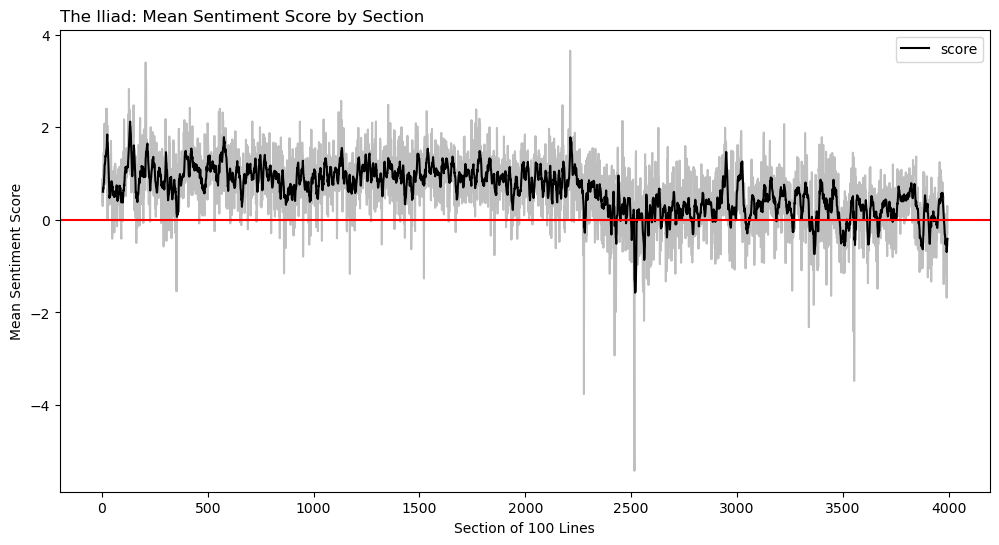

In [81]:
ax = score_acc.plot.line(legend=False, figsize=(12, 6), grid=True, alpha=0.5, color='gray')
score_acc.rolling(10, min_periods=5).mean().plot.line(ax=ax, color='black')
plt.xlabel('Section of 100 Lines')
plt.ylabel('Mean Sentiment Score')
plt.title('The Iliad: Mean Sentiment Score by Section', loc='left')
plt.axhline(0, color='red')
plt.xticks(rotation=0);